# <center> 2023 Saudi Arabian Grand Prix

### <center> by: Marsa Mahasin

 ## Import some libraries

In [1]:
import fastf1
import fastf1.plotting
from fastf1.core import Laps
from fastf1.ergast import Ergast

import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from timple.timedelta import strftimedelta

In [2]:
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

## Load qualifying and race data

In [ ]:
session_q = fastf1.get_session(2023, 'Saudi Arabian', 'Q')
session_r = fastf1.get_session(2023, 'Saudi Arabian', 'R')

session_q.load()
session_r.load()

In [ ]:
circuit_info = session_q.get_circuit_info()
circuit_info

## 1. Qualifying

In [5]:
a = session_q.results[['Abbreviation', 'Q1', 'Q2', 'Q3']]
a

,Abbreviation,Q1,Q2,Q3
11,PER,0 days 00:01:29.244000,0 days 00:01:28.635000,0 days 00:01:28.265000
16,LEC,0 days 00:01:29.376000,0 days 00:01:28.903000,0 days 00:01:28.420000
14,ALO,0 days 00:01:29.298000,0 days 00:01:28.757000,0 days 00:01:28.730000
63,RUS,0 days 00:01:29.592000,0 days 00:01:29.132000,0 days 00:01:28.857000
55,SAI,0 days 00:01:29.411000,0 days 00:01:28.957000,0 days 00:01:28.931000
18,STR,0 days 00:01:29.335000,0 days 00:01:28.962000,0 days 00:01:28.945000
31,OCO,0 days 00:01:29.707000,0 days 00:01:29.255000,0 days 00:01:29.078000
44,HAM,0 days 00:01:29.689000,0 days 00:01:29.374000,0 days 00:01:29.223000
81,PIA,0 days 00:01:29.706000,0 days 00:01:29.378000,0 days 00:01:29.243000
10,GAS,0 days 00:01:29.890000,0 days 00:01:29.411000,0 days 00:01:29.357000


In [6]:
drivers = pd.unique(session_q.laps['Driver'])
drivers

array(['PER', 'LEC', 'ALO', 'RUS', 'SAI', 'STR', 'OCO', 'HAM', 'PIA',
       'GAS', 'HUL', 'ZHO', 'MAG', 'BOT', 'VER', 'TSU', 'ALB', 'DEV',
       'NOR', 'SAR'], dtype=object)

In [ ]:
fastest_q = list()
for drv in drivers:
    fastest_q_2 = session_q.laps.pick_driver(drv).pick_fastest()
    fastest_q.append(fastest_q_2)

fastest_q

In [8]:
fastest_q_data = Laps(fastest_q).sort_values(by='LapTime').reset_index(drop=True)
fastest_q_data.columns
fastest_q_data[['Driver', 'LapTime', 'TyreLife', 'LapNumber', 'Stint', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'Compound']]

,Driver,LapTime,TyreLife,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,Compound
0,PER,0 days 00:01:28.265000,2.0,15.0,5.0,0 days 00:00:32.139000,0 days 00:00:27.982000,0 days 00:00:28.144000,294.0,330.0,307.0,SOFT
1,LEC,0 days 00:01:28.420000,2.0,18.0,4.0,0 days 00:00:32.154000,0 days 00:00:28.027000,0 days 00:00:28.239000,290.0,327.0,306.0,SOFT
2,ALO,0 days 00:01:28.730000,2.0,17.0,5.0,0 days 00:00:32.171000,0 days 00:00:28.084000,0 days 00:00:28.475000,291.0,318.0,297.0,SOFT
3,VER,0 days 00:01:28.761000,2.0,2.0,1.0,0 days 00:00:32.268000,0 days 00:00:28.188000,0 days 00:00:28.305000,293.0,331.0,311.0,SOFT
4,RUS,0 days 00:01:28.857000,2.0,20.0,6.0,0 days 00:00:32.231000,0 days 00:00:28.161000,0 days 00:00:28.465000,291.0,323.0,302.0,SOFT
5,SAI,0 days 00:01:28.931000,3.0,23.0,5.0,0 days 00:00:32.552000,0 days 00:00:28.125000,0 days 00:00:28.254000,290.0,323.0,302.0,SOFT
6,STR,0 days 00:01:28.945000,4.0,19.0,4.0,0 days 00:00:32.068000,0 days 00:00:28.137000,0 days 00:00:28.740000,293.0,317.0,295.0,SOFT
7,OCO,0 days 00:01:29.078000,3.0,23.0,5.0,0 days 00:00:32.301000,0 days 00:00:28.300000,0 days 00:00:28.477000,289.0,319.0,302.0,SOFT
8,HAM,0 days 00:01:29.223000,2.0,17.0,5.0,0 days 00:00:32.468000,0 days 00:00:28.203000,0 days 00:00:28.552000,290.0,322.0,296.0,SOFT
9,PIA,0 days 00:01:29.243000,4.0,22.0,5.0,0 days 00:00:32.426000,0 days 00:00:28.272000,0 days 00:00:28.545000,287.0,313.0,299.0,SOFT


In [9]:
fastest_q_data = fastest_q_data.loc[fastest_q_data['Driver'] != 'SAR']
fastest_q_data

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:08:35.640000,PER,11,0 days 00:01:28.265000,15.0,5.0,NaT,NaT,0 days 00:00:32.139000,0 days 00:00:27.982000,...,True,Red Bull Racing,0 days 01:07:07.375000,2023-03-18 17:52:07.479,1,NaN,False,,False,True
1,0 days 01:15:44.100000,LEC,16,0 days 00:01:28.420000,18.0,4.0,NaT,NaT,0 days 00:00:32.154000,0 days 00:00:28.027000,...,True,Ferrari,0 days 01:14:15.680000,2023-03-18 17:59:15.784,1,NaN,False,,False,True
2,0 days 01:14:28.836000,ALO,14,0 days 00:01:28.730000,17.0,5.0,NaT,NaT,0 days 00:00:32.171000,0 days 00:00:28.084000,...,True,Aston Martin,0 days 01:13:00.106000,2023-03-18 17:58:00.210,1,NaN,False,,False,True
3,0 days 00:21:47.489000,VER,1,0 days 00:01:28.761000,2.0,1.0,NaT,NaT,0 days 00:00:32.268000,0 days 00:00:28.188000,...,True,Red Bull Racing,0 days 00:20:18.728000,2023-03-18 17:05:18.832,1,NaN,False,,False,True
4,0 days 01:15:49.897000,RUS,63,0 days 00:01:28.857000,20.0,6.0,NaT,NaT,0 days 00:00:32.231000,0 days 00:00:28.161000,...,True,Mercedes,0 days 01:14:21.040000,2023-03-18 17:59:21.144,1,NaN,False,,False,True
5,0 days 01:16:04.291000,SAI,55,0 days 00:01:28.931000,23.0,5.0,NaT,NaT,0 days 00:00:32.552000,0 days 00:00:28.125000,...,True,Ferrari,0 days 01:14:35.360000,2023-03-18 17:59:35.464,1,NaN,False,,False,True
6,0 days 01:15:27.491000,STR,18,0 days 00:01:28.945000,19.0,4.0,NaT,NaT,0 days 00:00:32.068000,0 days 00:00:28.137000,...,True,Aston Martin,0 days 01:13:58.546000,2023-03-18 17:58:58.650,1,NaN,False,,False,True
7,0 days 01:15:16.370000,OCO,31,0 days 00:01:29.078000,23.0,5.0,NaT,NaT,0 days 00:00:32.301000,0 days 00:00:28.300000,...,True,Alpine,0 days 01:13:47.292000,2023-03-18 17:58:47.396,1,NaN,False,,False,True
8,0 days 01:07:25.662000,HAM,44,0 days 00:01:29.223000,17.0,5.0,NaT,NaT,0 days 00:00:32.468000,0 days 00:00:28.203000,...,True,Mercedes,0 days 01:05:56.439000,2023-03-18 17:50:56.543,1,NaN,False,,False,True
9,0 days 01:15:05.069000,PIA,81,0 days 00:01:29.243000,22.0,5.0,NaT,NaT,0 days 00:00:32.426000,0 days 00:00:28.272000,...,True,McLaren,0 days 01:13:35.826000,2023-03-18 17:58:35.930,1,NaN,False,,False,True


In [10]:
pole_lap = fastest_q_data.pick_fastest()
fastest_q_data['LapTimeDelta'] = fastest_q_data['LapTime'] - pole_lap['LapTime']

team_colors = list()
driver_list = list()
lap_time_delta = list()

for index, lap in fastest_q_data.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)
    driver = lap['Driver']
    driver_list.append(driver)
    lap_time_delta2 = lap['LapTimeDelta']
    lap_time_delta.append(lap_time_delta2)



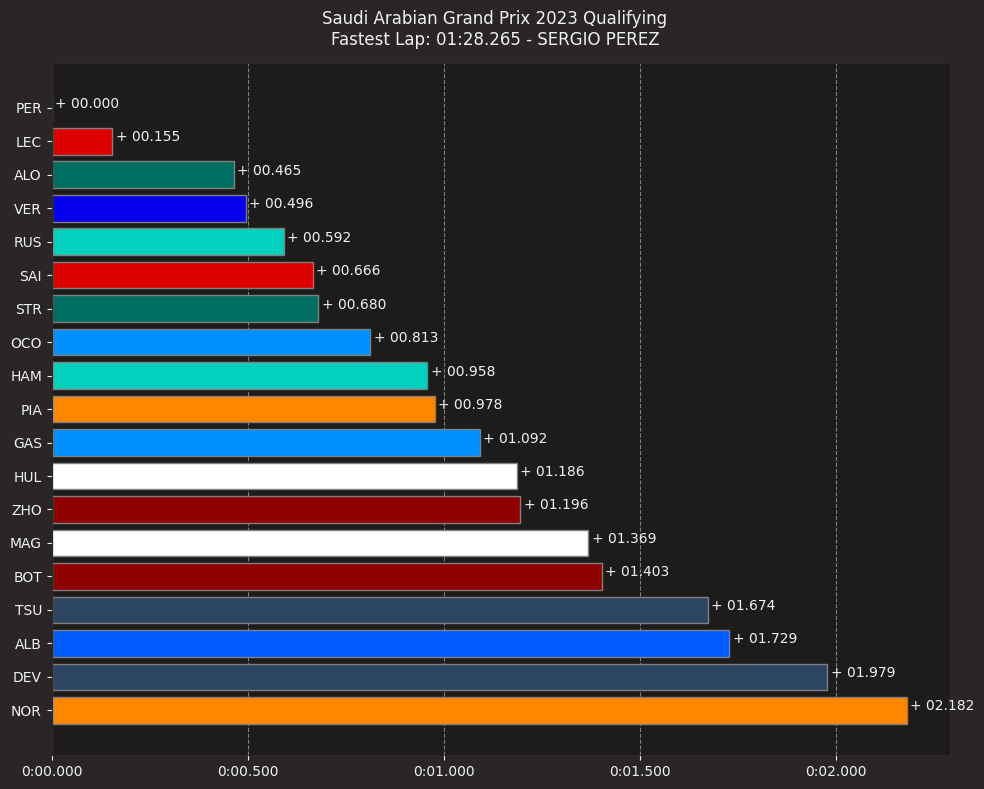

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))

bars = ax.barh(fastest_q_data.index,
               fastest_q_data['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_q_data.index)
ax.set_yticklabels(fastest_q_data['Driver'])

i = 0
for bar in bars:
    x = bar.get_x()
    y = bar.get_height()
    width = bar.get_width()
    plt.text(width+0.0000001, i,
             f"+ {strftimedelta(lap_time_delta[i], '%s.%ms')}")
    i += 1

ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='grey', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')
plt.suptitle(
    f"{session_q.event['EventName']} {session_q.event.year} Qualifying\n" f"Fastest Lap: {lap_time_string} - {fastf1.plotting.DRIVER_TRANSLATE[pole_lap['Driver']].upper()}")

plt.tight_layout()
plt.show()


### Watchout:
- Penjelasan 107% Rule
- Perez dominasi atas leclerc
- Apa yang terjadi dengan aston martin?
- Piastri berhasil menembus Q3 dan memiliki catatan waktu tipis dibanding hamilton
- Persaingan formula 1.5 minggu ini: Haas vs Alfa Romeo

## Perez vs Leclerc

In [ ]:
drivers_1 = ['PER', 'LEC']

drivers_1_lap = {}
drivers_1_car = {}

for drv in drivers_1:
    lap = session_q.laps.pick_driver(drv).pick_fastest()
    car = lap.get_telemetry().add_distance()

    drivers_1_lap[drv] = lap
    drivers_1_car[drv] = car



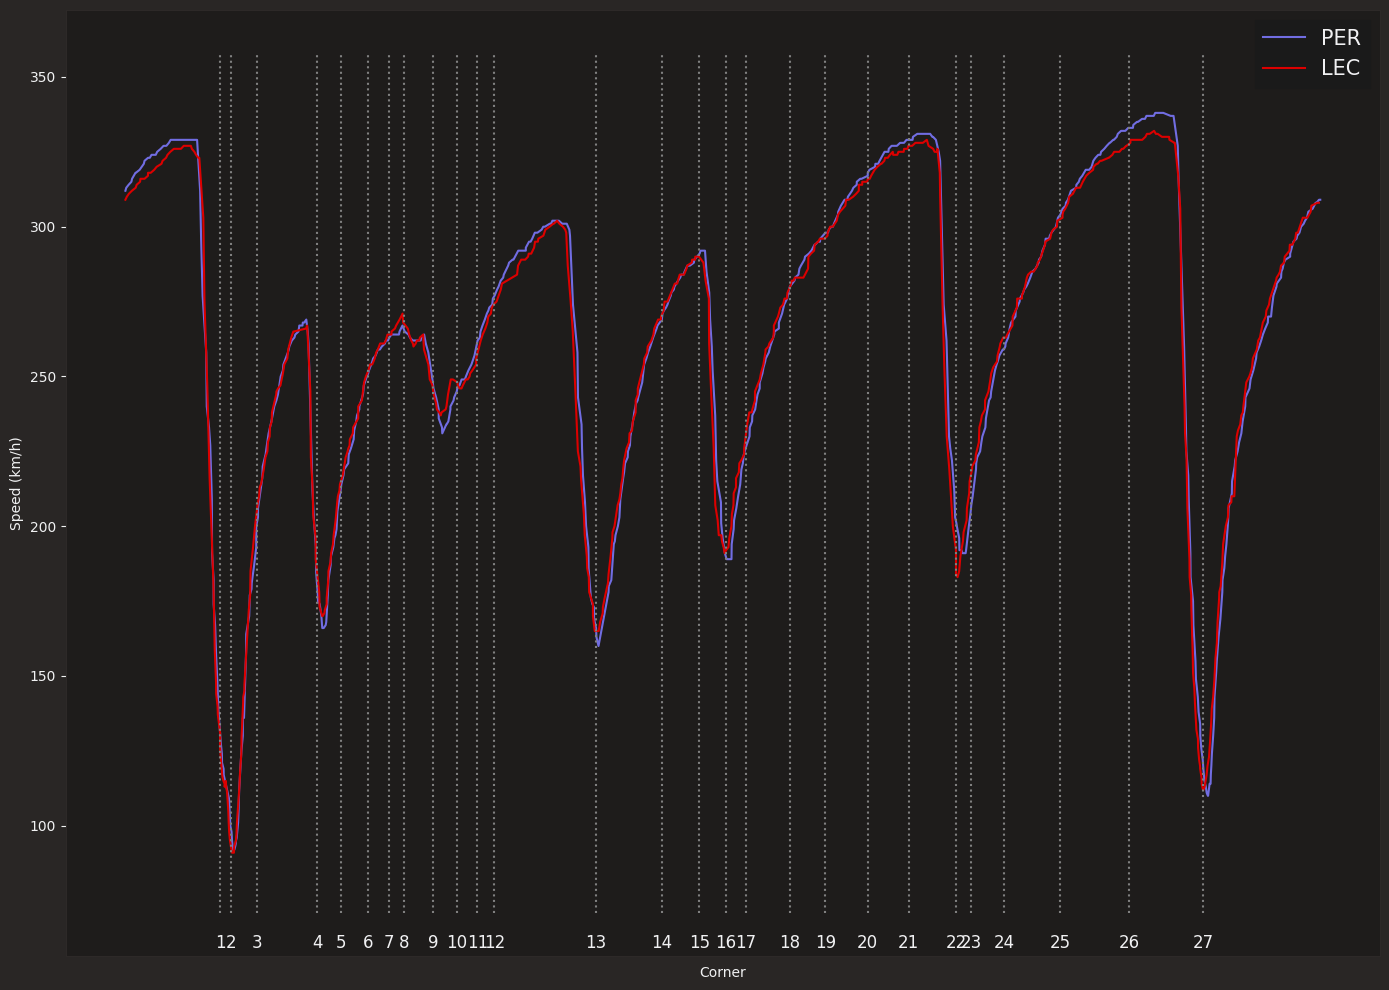

In [13]:
fig, ax = plt.subplots(figsize=(14, 10))

for drv in drivers_1:
    ax.plot(drivers_1_car[drv]['Distance'], drivers_1_car[drv]['Speed'], color=fastf1.plotting.driver_color(drv), label=drv, linewidth=1.5)

v_min = drivers_1_car['LEC']['Speed'].min()
v_max = drivers_1_car['PER']['Speed'].max()

ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20, linestyles='dotted', colors='grey')

for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min-30, txt,
            va='center', ha='center', size=12)
    
ax.set_xlabel('Corner')
ax.set_ylabel('Speed (km/h)')

plt.xticks([])
plt.minorticks_off()

ax.legend(bbox_to_anchor=(1, 1), fontsize=15)
plt.tight_layout()
plt.show()

- Perbedaan kecepatan antara perez dan leclerc terlihat melalui grafik ini, perbedaan mencolok terlihat di lurusan sebelum turn 22 dan 27[kotak biru].
- Leclerc lebih cepat saat melibas tikungan ketimbang perez, seperti pada turn 4, 9, 13, 16, dan 27 [kotak kuning]. Selain itu, Leclerc juga memiliki akselerasi yang lebih baik ketimbang perez pada saat keluar dari tikungan seperti pada turn 16 dan 22 namun hanya bertahan hingga pertengahan lurusan [panah hijau].

In [14]:
drivers_1_car['PER']

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance
2,2023-03-18 17:52:07.479,0 days 01:07:07.375000,,1040.072778,0 days 00:00:00,11099,312,8,100,False,12,interpolation,0.000016,OnTrack,-1304,253,118,0.000000
3,2023-03-18 17:52:07.530,0 days 01:07:07.426000,,1040.072778,0 days 00:00:00.051000,11111,313,8,100,False,12,pos,0.000743,OnTrack,-1320,296,118,4.434167
4,2023-03-18 17:52:07.669,0 days 01:07:07.565000,,1040.072778,0 days 00:00:00.190000,11134,314,8,100,False,12,car,0.002725,OnTrack,-1358,402,118,16.558056
5,2023-03-18 17:52:07.830,0 days 01:07:07.726000,,1040.072778,0 days 00:00:00.351000,11164,315,8,100,False,12,pos,0.005029,OnTrack,-1411,543,118,30.645556
6,2023-03-18 17:52:07.869,0 days 01:07:07.765000,16,1040.072778,0 days 00:00:00.390000,11194,316,8,100,False,12,car,0.005588,OnTrack,-1427,587,117,34.068889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,2023-03-18 17:53:35.289,0 days 01:08:35.185000,63,3173.605833,0 days 00:01:27.810000,10902,306,8,100,False,12,pos,0.991303,OnTrack,-1171,-129,118,6078.730278
662,2023-03-18 17:53:35.469,0 days 01:08:35.365000,63,3165.905833,0 days 00:01:27.990000,10984,308,8,100,False,12,car,0.993819,OnTrack,-1218,7,118,6094.130278
663,2023-03-18 17:53:35.529,0 days 01:08:35.425000,63,3162.461389,0 days 00:01:28.050000,11033,308,8,100,False,12,pos,0.994658,OnTrack,-1236,58,118,6099.263611
664,2023-03-18 17:53:35.669,0 days 01:08:35.565000,63,3159.016944,0 days 00:01:28.190000,11082,309,8,100,False,12,car,0.996619,OnTrack,-1276,173,117,6111.280278


In [15]:
for drv in drivers_1:
    drivers_1_car[drv]['Driver'] = drv
    
telemetry_per = drivers_1_car['PER']
telemetry_lec = drivers_1_car['LEC']

telemetry = pd.concat([telemetry_per, telemetry_lec])
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver
2,2023-03-18 17:52:07.479,0 days 01:07:07.375000,,1040.072778,0 days 00:00:00,11099,312,8,100,False,12,interpolation,0.000016,OnTrack,-1304,253,118,0.000000,PER
3,2023-03-18 17:52:07.530,0 days 01:07:07.426000,,1040.072778,0 days 00:00:00.051000,11111,313,8,100,False,12,pos,0.000743,OnTrack,-1320,296,118,4.434167,PER
4,2023-03-18 17:52:07.669,0 days 01:07:07.565000,,1040.072778,0 days 00:00:00.190000,11134,314,8,100,False,12,car,0.002725,OnTrack,-1358,402,118,16.558056,PER
5,2023-03-18 17:52:07.830,0 days 01:07:07.726000,,1040.072778,0 days 00:00:00.351000,11164,315,8,100,False,12,pos,0.005029,OnTrack,-1411,543,118,30.645556,PER
6,2023-03-18 17:52:07.869,0 days 01:07:07.765000,16,1040.072778,0 days 00:00:00.390000,11194,316,8,100,False,12,car,0.005588,OnTrack,-1427,587,117,34.068889,PER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,2023-03-18 18:00:43.709,0 days 01:15:43.605000,44,443.037917,0 days 00:01:27.925000,10887,305,8,99,False,12,pos,0.992126,OnTrack,-1187,-82,118,6068.574722,LEC
663,2023-03-18 18:00:43.752,0 days 01:15:43.648000,44,438.050556,0 days 00:01:27.968000,10913,307,8,99,False,12,car,0.992726,OnTrack,-1199,-44,117,6072.241667,LEC
664,2023-03-18 18:00:44.112,0 days 01:15:44.008000,44,421.950556,0 days 00:01:28.328000,10909,308,8,99,False,12,car,0.997757,OnTrack,-1307,264,117,6103.041667,LEC
665,2023-03-18 18:00:44.129,0 days 01:15:44.025000,44,421.950556,0 days 00:01:28.345000,10951,308,8,99,False,12,pos,0.997995,OnTrack,-1312,276,118,6104.496111,LEC


In [16]:
num_minisectors = 25
total_distance = max(telemetry['Distance'])
minisector_length = total_distance/num_minisectors
minisector_length

244.70871111111086

In [17]:
minisectors = [0]
for i in range(0, (num_minisectors-1)):
    minisectors.append(minisector_length * (i+1))
    
minisectors

[0,
 244.70871111111086,
 489.4174222222217,
 734.1261333333325,
 978.8348444444434,
 1223.5435555555543,
 1468.252266666665,
 1712.960977777776,
 1957.6696888888869,
 2202.378399999998,
 2447.0871111111087,
 2691.7958222222196,
 2936.50453333333,
 3181.213244444441,
 3425.921955555552,
 3670.630666666663,
 3915.3393777777737,
 4160.048088888884,
 4404.756799999996,
 4649.465511111106,
 4894.174222222217,
 5138.882933333328,
 5383.591644444439,
 5628.30035555555,
 5873.00906666666]

In [18]:
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )

)
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector
2,2023-03-18 17:52:07.479,0 days 01:07:07.375000,,1040.072778,0 days 00:00:00,11099,312,8,100,False,12,interpolation,0.000016,OnTrack,-1304,253,118,0.000000,PER,1
3,2023-03-18 17:52:07.530,0 days 01:07:07.426000,,1040.072778,0 days 00:00:00.051000,11111,313,8,100,False,12,pos,0.000743,OnTrack,-1320,296,118,4.434167,PER,1
4,2023-03-18 17:52:07.669,0 days 01:07:07.565000,,1040.072778,0 days 00:00:00.190000,11134,314,8,100,False,12,car,0.002725,OnTrack,-1358,402,118,16.558056,PER,1
5,2023-03-18 17:52:07.830,0 days 01:07:07.726000,,1040.072778,0 days 00:00:00.351000,11164,315,8,100,False,12,pos,0.005029,OnTrack,-1411,543,118,30.645556,PER,1
6,2023-03-18 17:52:07.869,0 days 01:07:07.765000,16,1040.072778,0 days 00:00:00.390000,11194,316,8,100,False,12,car,0.005588,OnTrack,-1427,587,117,34.068889,PER,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,2023-03-18 18:00:43.709,0 days 01:15:43.605000,44,443.037917,0 days 00:01:27.925000,10887,305,8,99,False,12,pos,0.992126,OnTrack,-1187,-82,118,6068.574722,LEC,25
663,2023-03-18 18:00:43.752,0 days 01:15:43.648000,44,438.050556,0 days 00:01:27.968000,10913,307,8,99,False,12,car,0.992726,OnTrack,-1199,-44,117,6072.241667,LEC,25
664,2023-03-18 18:00:44.112,0 days 01:15:44.008000,44,421.950556,0 days 00:01:28.328000,10909,308,8,99,False,12,car,0.997757,OnTrack,-1307,264,117,6103.041667,LEC,25
665,2023-03-18 18:00:44.129,0 days 01:15:44.025000,44,421.950556,0 days 00:01:28.345000,10951,308,8,99,False,12,pos,0.997995,OnTrack,-1312,276,118,6104.496111,LEC,25


In [19]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,LEC,317.050000
1,1,PER,321.272727
2,2,LEC,255.900000
3,2,PER,255.724138
4,3,LEC,140.220000
5,3,PER,142.390244
6,4,LEC,241.720000
7,4,PER,247.692308
8,5,LEC,205.647059
9,5,PER,205.060606


In [20]:
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'FastestDriver'})
fastest_driver

,Minisector,FastestDriver
1,1,PER
2,2,LEC
5,3,PER
7,4,PER
8,5,LEC
10,6,LEC
12,7,LEC
15,8,PER
17,9,PER
19,10,PER


In [21]:
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])
telemetry = telemetry.sort_values(by=['Distance'])
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector,FastestDriver
0,2023-03-18 17:52:07.479,0 days 01:07:07.375000,,1040.072778,0 days 00:00:00,11099,312,8,100,False,...,interpolation,0.000016,OnTrack,-1304,253,118,0.000000,PER,1,PER
22,2023-03-18 17:59:15.784,0 days 01:14:15.680000,,470.786944,0 days 00:00:00,10923,309,8,99,False,...,interpolation,0.000002,OnTrack,-1309,269,117,0.000000,LEC,1,PER
1,2023-03-18 17:52:07.530,0 days 01:07:07.426000,,1040.072778,0 days 00:00:00.051000,11111,313,8,100,False,...,pos,0.000743,OnTrack,-1320,296,118,4.434167,PER,1,PER
23,2023-03-18 17:59:15.869,0 days 01:14:15.765000,,470.786944,0 days 00:00:00.085000,10953,310,8,99,False,...,pos,0.001201,OnTrack,-1330,325,118,7.319444,LEC,1,PER
2,2023-03-18 17:52:07.669,0 days 01:07:07.565000,,1040.072778,0 days 00:00:00.190000,11134,314,8,100,False,...,car,0.002725,OnTrack,-1358,402,118,16.558056,PER,1,PER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,2023-03-18 18:00:44.112,0 days 01:15:44.008000,44,421.950556,0 days 00:01:28.328000,10909,308,8,99,False,...,car,0.997757,OnTrack,-1307,264,117,6103.041667,LEC,25,LEC
1326,2023-03-18 18:00:44.129,0 days 01:15:44.025000,44,421.950556,0 days 00:01:28.345000,10951,308,8,99,False,...,pos,0.997995,OnTrack,-1312,276,118,6104.496111,LEC,25,LEC
1327,2023-03-18 18:00:44.204,0 days 01:15:44.100000,44,421.950556,0 days 00:01:28.420000,10972,308,8,99,False,...,interpolation,0.999046,OnTrack,-1329,323,119,6110.912778,LEC,25,LEC
1304,2023-03-18 17:53:35.669,0 days 01:08:35.565000,63,3159.016944,0 days 00:01:28.190000,11082,309,8,100,False,...,car,0.996619,OnTrack,-1276,173,117,6111.280278,PER,25,LEC


In [22]:
telemetry.loc[telemetry['FastestDriver'] == 'PER', 'FastestDriverInt'] = 1
telemetry.loc[telemetry['FastestDriver'] == 'LEC', 'FastestDriverInt'] = 2
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector,FastestDriver,FastestDriverInt
0,2023-03-18 17:52:07.479,0 days 01:07:07.375000,,1040.072778,0 days 00:00:00,11099,312,8,100,False,...,0.000016,OnTrack,-1304,253,118,0.000000,PER,1,PER,1.0
22,2023-03-18 17:59:15.784,0 days 01:14:15.680000,,470.786944,0 days 00:00:00,10923,309,8,99,False,...,0.000002,OnTrack,-1309,269,117,0.000000,LEC,1,PER,1.0
1,2023-03-18 17:52:07.530,0 days 01:07:07.426000,,1040.072778,0 days 00:00:00.051000,11111,313,8,100,False,...,0.000743,OnTrack,-1320,296,118,4.434167,PER,1,PER,1.0
23,2023-03-18 17:59:15.869,0 days 01:14:15.765000,,470.786944,0 days 00:00:00.085000,10953,310,8,99,False,...,0.001201,OnTrack,-1330,325,118,7.319444,LEC,1,PER,1.0
2,2023-03-18 17:52:07.669,0 days 01:07:07.565000,,1040.072778,0 days 00:00:00.190000,11134,314,8,100,False,...,0.002725,OnTrack,-1358,402,118,16.558056,PER,1,PER,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,2023-03-18 18:00:44.112,0 days 01:15:44.008000,44,421.950556,0 days 00:01:28.328000,10909,308,8,99,False,...,0.997757,OnTrack,-1307,264,117,6103.041667,LEC,25,LEC,2.0
1326,2023-03-18 18:00:44.129,0 days 01:15:44.025000,44,421.950556,0 days 00:01:28.345000,10951,308,8,99,False,...,0.997995,OnTrack,-1312,276,118,6104.496111,LEC,25,LEC,2.0
1327,2023-03-18 18:00:44.204,0 days 01:15:44.100000,44,421.950556,0 days 00:01:28.420000,10972,308,8,99,False,...,0.999046,OnTrack,-1329,323,119,6110.912778,LEC,25,LEC,2.0
1304,2023-03-18 17:53:35.669,0 days 01:08:35.565000,63,3159.016944,0 days 00:01:28.190000,11082,309,8,100,False,...,0.996619,OnTrack,-1276,173,117,6111.280278,PER,25,LEC,2.0


In [23]:
condition = telemetry['FastestDriverInt'] == 1
count = len(telemetry[condition])

total_rows = len(telemetry)
percentage = (count/total_rows) * 100
percentage

62.90443942814146

In [24]:
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

track_angle = circuit_info.rotation / 180 * np.pi

-2.724074074074074


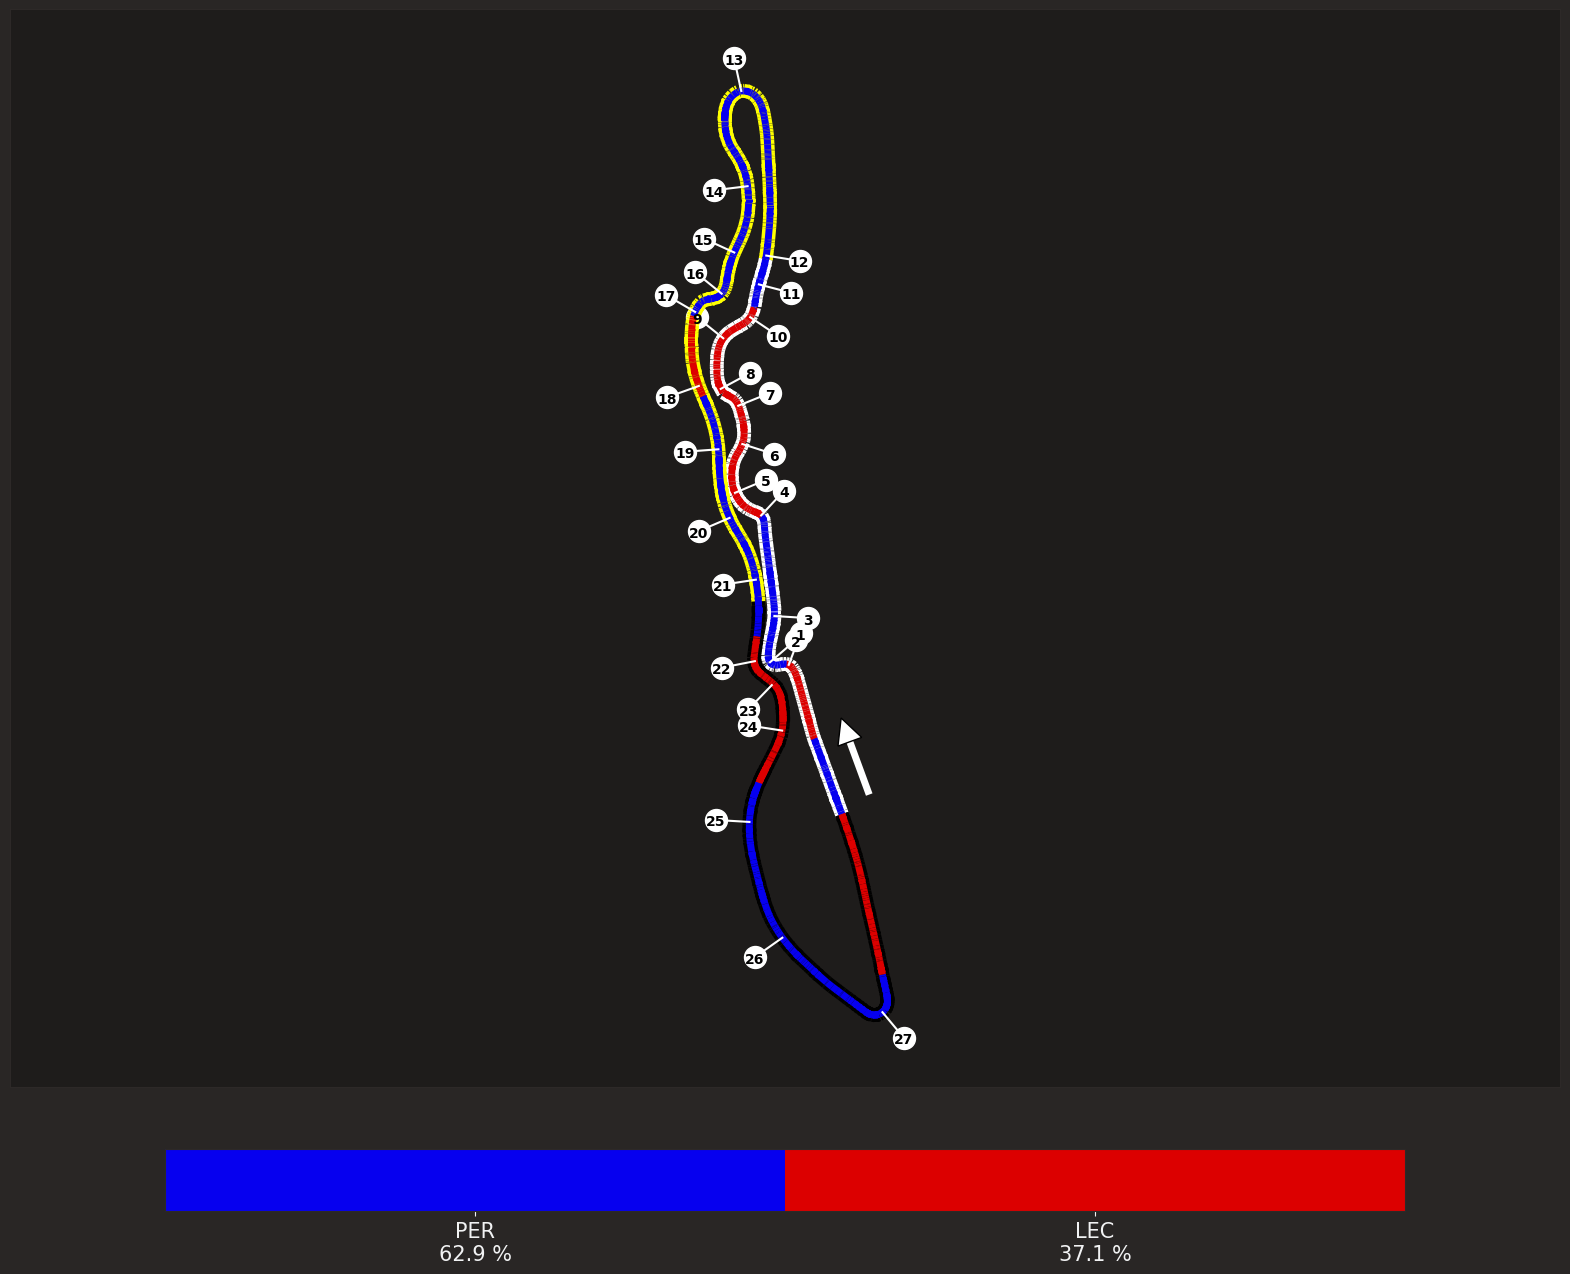

In [25]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

custom_colors1 = ['#0600ef', '#dc0000']
custom_cmap1 = ListedColormap(custom_colors1)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['FastestDriverInt'].to_numpy().astype(float)

sector123 = segments.size // 4
part_size = sector123 // 3
part_size

start_1, end_1 = 0, part_size
start_2, end_2 = part_size, 2 * part_size
start_3, end_3 = 2 * part_size, sector123

lc_comp = LineCollection(segments, norm=plt.Normalize(1, custom_cmap1.N+1), cmap=custom_cmap1)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

sector1 = LineCollection(segments[start_1:end_1])
sector1.set_linewidth(10)
sector1.set_color('white')

sector2 = LineCollection(segments[start_2:end_2])
sector2.set_linewidth(10)
sector2.set_color('yellow')

sector3 = LineCollection(segments[start_3:end_3])
sector3.set_linewidth(10)
sector3.set_color('black')

start_line = Line2D([x[0]+750, x[30]+750], [y[0]+750, y[30]+750], color='white', label='Diagonal Line', linewidth=5)

plt.rcParams['figure.figsize'] = [20, 20]

plt.gca().add_line(start_line)
plt.gca().add_collection(sector1)
plt.gca().add_collection(sector2)
plt.gca().add_collection(sector3)
plt.gca().add_collection(lc_comp)

offset_vector = [1000, 0]

for _, corner in circuit_info.corners.iterrows():
    
    txt = f"{corner['Number']}{corner['Letter']}"

    offset_angle = corner['Angle'] / 180 * np.pi

    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    
    track_x, track_y = ([corner['X'], corner['Y']])


    plt.scatter(text_x, text_y, color='white', s=250)


    plt.plot([track_x, text_x], [track_y, text_y], color='white')

    plt.text(text_x, text_y, txt, va='center_baseline', ha='center', size='10', color='black', weight='bold')


plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)


slope = (y[30] - y[0]) / (x[30] - x[0])
print(slope)
angle = np.arctan(slope)
angle_degrees = np.degrees(angle)

plt.arrow(x[30]+750, y[30]+750, -(0.1 * np.cos(angle)), -(0.1 * np.sin(angle)), head_width=750, head_length=750, fc='white', ec='black', zorder=2)


cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 4), location='bottom', shrink=0.8, anchor=(0.5, 2))
cbar.set_ticks(np.arange(1.5, 3.5))
cbar.set_ticklabels([f"PER\n"f"{round(percentage, 2)} %", f"LEC\n"f"{round(100-percentage, 2)} %"], size=15)

plt.show()

In [26]:
qf_list = ['Driver', 'LapTime', 'Stint', 'LapNumber', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'TyreLife', 'SpeedST']
a = pd.concat([drivers_1_lap['PER'][qf_list], drivers_1_lap['LEC'][qf_list]], keys=['PER', 'LEC'], axis=1)

sector1delta = a['LEC']['Sector1Time'] - a['PER']['Sector1Time']
sector2delta = a['LEC']['Sector2Time'] - a['PER']['Sector2Time']
sector3delta = a['LEC']['Sector3Time'] - a['PER']['Sector3Time']

print(f"Sector 1 Delta: {sector1delta}")
print(f"Sector 2 Delta: {sector2delta}")
print(f"Sector 3 Delta: {sector3delta}")

a

Sector 1 Delta: 0 days 00:00:00.015000
Sector 2 Delta: 0 days 00:00:00.045000
Sector 3 Delta: 0 days 00:00:00.095000


,PER,LEC
Driver,PER,LEC
LapTime,0 days 00:01:28.265000,0 days 00:01:28.420000
Stint,5.0,4.0
LapNumber,15.0,18.0
Sector1Time,0 days 00:00:32.139000,0 days 00:00:32.154000
Sector2Time,0 days 00:00:27.982000,0 days 00:00:28.027000
Sector3Time,0 days 00:00:28.144000,0 days 00:00:28.239000
SpeedI1,294.0,290.0
SpeedI2,330.0,327.0
SpeedFL,307.0,306.0


Lap time, time di sektor 1, time di sektor 2, time di sektor 3, top speed setiap sektor, semuanya dimenangkan oleh Perez.

Perez menguasai 62.9% bagian dari track apabila dibandingkan dengan Leclerc. Lalu, sesuai dengan grafik sebelumnya, perez menguasai lurusan DRS di sektor 2 dan 3 (panah kuning) sedangkan leclerc menguasai tikungan lambat di sektor 1 (panah merah). 
Kedua lurusan yang dikuasai perez tersebut merupakan lurusan dengan DRS dan kecepatan perez di lurusan tersebut mencapai 330 km/h (berdasarkan speedtrap sector 2) dan 337 km/h (berdasarkan speedtrap sector 3).


In [27]:
brake_area = telemetry.loc[(telemetry['Brake'] == True) & (telemetry['Throttle'] < 30) & (telemetry['Driver'] == 'PER')]
brake_area

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector,FastestDriver,FastestDriverInt
55,2023-03-18 17:52:11.790,0 days 01:07:11.686000,16,859.971111,0 days 00:00:04.311000,10388,296,8,0,True,...,0.063140,OnTrack,-2527,3914,118,387.627778,PER,2,LEC,2.0
56,2023-03-18 17:52:11.889,0 days 01:07:11.785000,16,858.008148,0 days 00:00:04.410000,10402,277,8,0,True,...,0.064312,OnTrack,-2548,3991,118,395.245278,PER,2,LEC,2.0
57,2023-03-18 17:52:12.149,0 days 01:07:12.045000,16,856.045185,0 days 00:00:04.670000,10416,258,8,0,True,...,0.067058,OnTrack,-2599,4173,117,413.878611,PER,2,LEC,2.0
58,2023-03-18 17:52:12.190,0 days 01:07:12.086000,16,854.082222,0 days 00:00:04.711000,10430,240,8,0,True,...,0.067489,OnTrack,-2606,4199,116,416.611944,PER,2,LEC,2.0
59,2023-03-18 17:52:12.369,0 days 01:07:12.265000,16,852.682222,0 days 00:00:04.890000,10328,233,8,0,True,...,0.069378,OnTrack,-2638,4308,117,428.197222,PER,2,LEC,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,2023-03-18 17:53:25.769,0 days 01:08:25.665000,31,722.900833,0 days 00:01:18.290000,9461,134,3,1,True,...,0.897009,OnTrack,-330,-5640,114,5502.793889,PER,23,PER,1.0
1156,2023-03-18 17:53:25.790,0 days 01:08:25.686000,31,719.234167,0 days 00:01:18.311000,9252,130,3,3,True,...,0.897130,OnTrack,-317,-5637,114,5503.552222,PER,23,PER,1.0
1157,2023-03-18 17:53:25.929,0 days 01:08:25.825000,31,713.734167,0 days 00:01:18.450000,8820,126,3,3,True,...,0.897916,OnTrack,-228,-5615,114,5508.417222,PER,23,PER,1.0
1158,2023-03-18 17:53:26.150,0 days 01:08:26.046000,31,708.234167,0 days 00:01:18.671000,8388,122,3,3,True,...,0.899119,OnTrack,-180,-5598,114,5515.906667,PER,23,PER,1.0


# Piastri hits Q3!

In [ ]:
drivers_2 = ['HAM', 'PIA']
drivers_2_lap = {}
drivers_2_car = {}

for drv in drivers_2:
    lap = session_q.laps.pick_driver(drv).pick_fastest()
    car = lap.get_telemetry().add_distance()

    drivers_2_lap[drv] = lap
    drivers_2_car[drv] = car

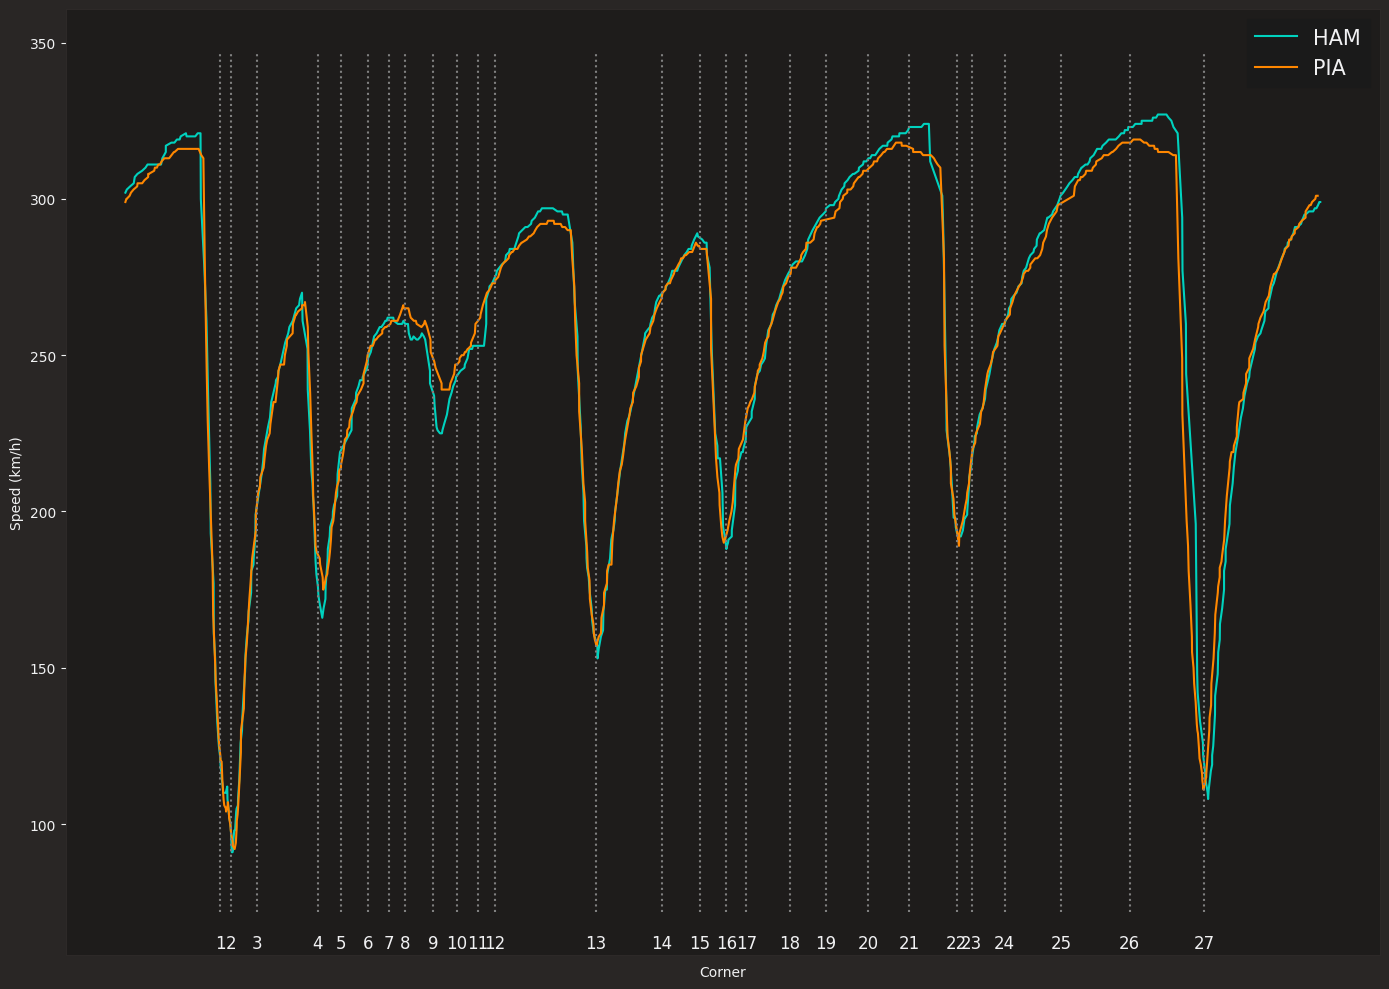

In [29]:
fig, ax = plt.subplots(figsize=(14, 10))

for drv in drivers_2:
    ax.plot(drivers_2_car[drv]['Distance'], drivers_2_car[drv]['Speed'], color=fastf1.plotting.driver_color(drv), label=drv, linewidth=1.5)

v_min = drivers_2_car['PIA']['Speed'].min()
v_max = drivers_2_car['HAM']['Speed'].max()

ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20, linestyles='dotted', colors='grey')

for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min-30, txt,
            va='center', ha='center', size=12)
    
ax.set_xlabel('Corner')
ax.set_ylabel('Speed (km/h)')

plt.xticks([])
plt.minorticks_off()

ax.legend(bbox_to_anchor=(1, 1), fontsize=15)
plt.tight_layout()
plt.show()

- Hamilton memiliki keunggulan top speed di seluruh lurusan di track dan piastri selalu melakukan "lift and coast" saat mendekati tikungan [kotak kuning]. Lift and coast adalah melepas tekanan pada pedal gas saat memasuki tikungan yang berfungsi untuk menghemat bensin dan hal ini juga yang bisa berakibat pada waktunya yang lebih lambat dari hamilton.
- Tetapi piastri memiliki keunggulan dari segi akselerasi, terlihat dari progresi kecepatan piastri yang mengungguli hamilton walau pada akhirnya hamilton tetap bisa meraih top speed lebih tinggi ketimbang piastri[panah kuning], selain itu piastri juga memiliki corner speed yang lebih cepat dari hamilton [kotak merah].

In [30]:
for drv in drivers_2:
    drivers_2_car[drv]['Driver'] = drv
    
telemetry_ham = drivers_2_car['HAM']
telemetry_pia = drivers_2_car['PIA']

telemetry = pd.concat([telemetry_ham, telemetry_pia])
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver
2,2023-03-18 17:50:56.543,0 days 01:05:56.439000,,3049.262778,0 days 00:00:00,11149,302,8,100,False,12,interpolation,0.000013,OnTrack,-1305,257,117,0.000000,HAM
3,2023-03-18 17:50:56.629,0 days 01:05:56.525000,,3049.262778,0 days 00:00:00.086000,11173,303,8,100,False,12,car,0.001199,OnTrack,-1323,305,117,7.238333,HAM
4,2023-03-18 17:50:56.829,0 days 01:05:56.725000,,3049.262778,0 days 00:00:00.286000,11204,304,8,100,False,12,pos,0.003973,OnTrack,-1372,437,118,24.127222,HAM
5,2023-03-18 17:50:57.049,0 days 01:05:56.945000,,3049.262778,0 days 00:00:00.506000,11235,305,8,100,False,12,pos,0.007042,OnTrack,-1436,613,118,42.766111,HAM
6,2023-03-18 17:50:57.109,0 days 01:05:57.005000,55,3049.262778,0 days 00:00:00.566000,11266,307,8,100,False,12,car,0.007880,OnTrack,-1454,662,117,47.882778,HAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,2023-03-18 18:00:04.749,0 days 01:15:04.645000,55,1888.001111,0 days 00:01:28.819000,10556,298,8,99,False,12,pos,0.992847,OnTrack,-1175,-118,118,6064.506389,PIA
686,2023-03-18 18:00:04.831,0 days 01:15:04.727000,55,1887.178889,0 days 00:01:28.901000,10556,299,8,99,False,12,car,0.993963,OnTrack,-1195,-56,117,6071.316944,PIA
687,2023-03-18 18:00:05.029,0 days 01:15:04.925000,55,1885.945556,0 days 00:01:29.099000,10599,300,8,99,False,12,pos,0.996669,OnTrack,-1244,81,118,6087.816944,PIA
688,2023-03-18 18:00:05.071,0 days 01:15:04.967000,55,1884.712222,0 days 00:01:29.141000,10643,301,8,99,False,12,car,0.997246,OnTrack,-1254,112,118,6091.328611,PIA


In [31]:
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )

)
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector
2,2023-03-18 17:50:56.543,0 days 01:05:56.439000,,3049.262778,0 days 00:00:00,11149,302,8,100,False,12,interpolation,0.000013,OnTrack,-1305,257,117,0.000000,HAM,1
3,2023-03-18 17:50:56.629,0 days 01:05:56.525000,,3049.262778,0 days 00:00:00.086000,11173,303,8,100,False,12,car,0.001199,OnTrack,-1323,305,117,7.238333,HAM,1
4,2023-03-18 17:50:56.829,0 days 01:05:56.725000,,3049.262778,0 days 00:00:00.286000,11204,304,8,100,False,12,pos,0.003973,OnTrack,-1372,437,118,24.127222,HAM,1
5,2023-03-18 17:50:57.049,0 days 01:05:56.945000,,3049.262778,0 days 00:00:00.506000,11235,305,8,100,False,12,pos,0.007042,OnTrack,-1436,613,118,42.766111,HAM,1
6,2023-03-18 17:50:57.109,0 days 01:05:57.005000,55,3049.262778,0 days 00:00:00.566000,11266,307,8,100,False,12,car,0.007880,OnTrack,-1454,662,117,47.882778,HAM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,2023-03-18 18:00:04.749,0 days 01:15:04.645000,55,1888.001111,0 days 00:01:28.819000,10556,298,8,99,False,12,pos,0.992847,OnTrack,-1175,-118,118,6064.506389,PIA,25
686,2023-03-18 18:00:04.831,0 days 01:15:04.727000,55,1887.178889,0 days 00:01:28.901000,10556,299,8,99,False,12,car,0.993963,OnTrack,-1195,-56,117,6071.316944,PIA,25
687,2023-03-18 18:00:05.029,0 days 01:15:04.925000,55,1885.945556,0 days 00:01:29.099000,10599,300,8,99,False,12,pos,0.996669,OnTrack,-1244,81,118,6087.816944,PIA,25
688,2023-03-18 18:00:05.071,0 days 01:15:04.967000,55,1884.712222,0 days 00:01:29.141000,10643,301,8,99,False,12,car,0.997246,OnTrack,-1254,112,118,6091.328611,PIA,25


In [32]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,HAM,310.300000
1,1,PIA,307.280000
2,2,HAM,238.071429
3,2,PIA,239.878788
4,3,HAM,137.224490
5,3,PIA,139.108696
6,4,HAM,239.629630
7,4,PIA,241.193548
8,5,HAM,203.960000
9,5,PIA,209.916667


In [33]:
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'FastestDriver'})
fastest_driver

,Minisector,FastestDriver
0,1,HAM
3,2,PIA
5,3,PIA
7,4,PIA
9,5,PIA
11,6,PIA
13,7,PIA
15,8,PIA
16,9,HAM
18,10,HAM


In [34]:
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])
telemetry = telemetry.sort_values(by=['Distance'])
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector,FastestDriver
0,2023-03-18 17:50:56.543,0 days 01:05:56.439000,,3049.262778,0 days 00:00:00,11149,302,8,100,False,...,interpolation,0.000013,OnTrack,-1305,257,117,0.000000,HAM,1,HAM
20,2023-03-18 17:58:35.930,0 days 01:13:35.826000,,3192.105000,0 days 00:00:00,10559,299,8,99,False,...,interpolation,0.000018,OnTrack,-1291,217,118,0.000000,PIA,1,HAM
21,2023-03-18 17:58:35.991,0 days 01:13:35.887000,,3192.105000,0 days 00:00:00.061000,10584,300,8,99,False,...,car,0.000852,OnTrack,-1308,263,118,5.083333,PIA,1,HAM
22,2023-03-18 17:58:36.010,0 days 01:13:35.906000,,3192.105000,0 days 00:00:00.080000,10611,300,8,99,False,...,pos,0.001112,OnTrack,-1313,277,118,6.666667,PIA,1,HAM
1,2023-03-18 17:50:56.629,0 days 01:05:56.525000,,3049.262778,0 days 00:00:00.086000,11173,303,8,100,False,...,car,0.001199,OnTrack,-1323,305,117,7.238333,HAM,1,HAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,2023-03-18 17:52:25.529,0 days 01:07:25.425000,55,2336.468889,0 days 00:01:28.986000,10937,297,8,100,False,...,pos,0.993738,OnTrack,-1225,26,118,6093.536111,HAM,25,PIA
1334,2023-03-18 18:00:05.173,0 days 01:15:05.069000,55,1884.712222,0 days 00:01:29.243000,10657,301,8,99,False,...,interpolation,0.998648,OnTrack,-1290,201,131,6099.856944,PIA,25,PIA
1307,2023-03-18 17:52:25.630,0 days 01:07:25.526000,55,2333.246667,0 days 00:01:29.087000,10949,298,8,100,False,...,car,0.995104,OnTrack,-1251,103,117,6101.896667,HAM,25,PIA
1308,2023-03-18 17:52:25.709,0 days 01:07:25.605000,55,2333.246667,0 days 00:01:29.166000,10994,299,8,100,False,...,pos,0.996174,OnTrack,-1273,166,118,6108.458056,HAM,25,PIA


In [35]:
telemetry.loc[telemetry['FastestDriver'] == 'HAM', 'FastestDriverInt'] = 1
telemetry.loc[telemetry['FastestDriver'] == 'PIA', 'FastestDriverInt'] = 2
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector,FastestDriver,FastestDriverInt
0,2023-03-18 17:50:56.543,0 days 01:05:56.439000,,3049.262778,0 days 00:00:00,11149,302,8,100,False,...,0.000013,OnTrack,-1305,257,117,0.000000,HAM,1,HAM,1.0
20,2023-03-18 17:58:35.930,0 days 01:13:35.826000,,3192.105000,0 days 00:00:00,10559,299,8,99,False,...,0.000018,OnTrack,-1291,217,118,0.000000,PIA,1,HAM,1.0
21,2023-03-18 17:58:35.991,0 days 01:13:35.887000,,3192.105000,0 days 00:00:00.061000,10584,300,8,99,False,...,0.000852,OnTrack,-1308,263,118,5.083333,PIA,1,HAM,1.0
22,2023-03-18 17:58:36.010,0 days 01:13:35.906000,,3192.105000,0 days 00:00:00.080000,10611,300,8,99,False,...,0.001112,OnTrack,-1313,277,118,6.666667,PIA,1,HAM,1.0
1,2023-03-18 17:50:56.629,0 days 01:05:56.525000,,3049.262778,0 days 00:00:00.086000,11173,303,8,100,False,...,0.001199,OnTrack,-1323,305,117,7.238333,HAM,1,HAM,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,2023-03-18 17:52:25.529,0 days 01:07:25.425000,55,2336.468889,0 days 00:01:28.986000,10937,297,8,100,False,...,0.993738,OnTrack,-1225,26,118,6093.536111,HAM,25,PIA,2.0
1334,2023-03-18 18:00:05.173,0 days 01:15:05.069000,55,1884.712222,0 days 00:01:29.243000,10657,301,8,99,False,...,0.998648,OnTrack,-1290,201,131,6099.856944,PIA,25,PIA,2.0
1307,2023-03-18 17:52:25.630,0 days 01:07:25.526000,55,2333.246667,0 days 00:01:29.087000,10949,298,8,100,False,...,0.995104,OnTrack,-1251,103,117,6101.896667,HAM,25,PIA,2.0
1308,2023-03-18 17:52:25.709,0 days 01:07:25.605000,55,2333.246667,0 days 00:01:29.166000,10994,299,8,100,False,...,0.996174,OnTrack,-1273,166,118,6108.458056,HAM,25,PIA,2.0


In [36]:
condition = telemetry['FastestDriverInt'] == 1
count = len(telemetry[condition])

total_rows = len(telemetry)
percentage = (count/total_rows) * 100
percentage

43.670411985018724

In [ ]:
pos = lap.get_pos_data()
lap = session_q.laps.pick_fastest()

-2.7247191011235956


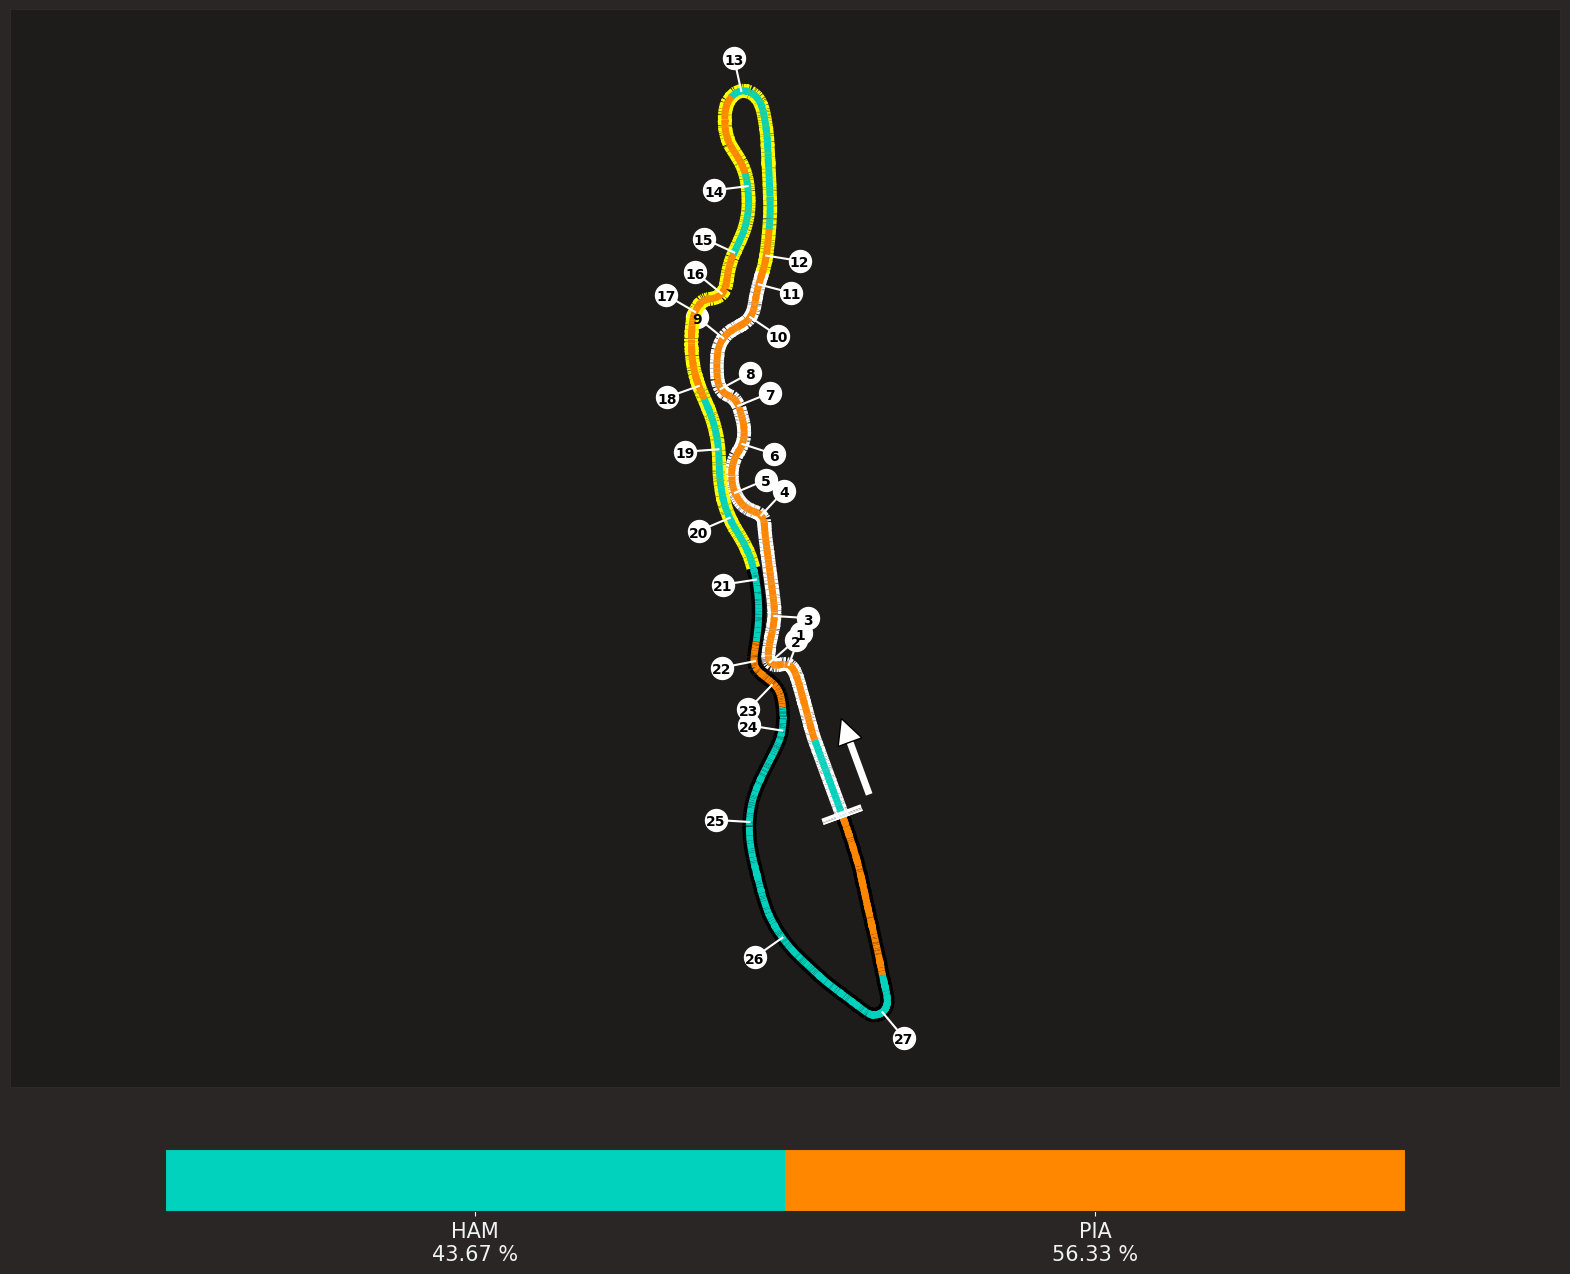

In [38]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

custom_colors1 = ['#00d2be', '#ff8700']
custom_cmap1 = ListedColormap(custom_colors1)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['FastestDriverInt'].to_numpy().astype(float)

sector123 = segments.size // 4
part_size = sector123 // 3
part_size

start_1, end_1 = 0, part_size
start_2, end_2 = part_size, 2 * part_size
start_3, end_3 = 2 * part_size, sector123

lc_comp = LineCollection(segments, norm=plt.Normalize(1, custom_cmap1.N+1), cmap=custom_cmap1)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

start_line = LineCollection(segments[0:5])
start_line.set_linewidth(30)
start_line.set_color('white')

sector1 = LineCollection(segments[start_1:end_1])
sector1.set_linewidth(10)
sector1.set_color('white')

sector2 = LineCollection(segments[start_2:end_2])
sector2.set_linewidth(10)
sector2.set_color('yellow')

sector3 = LineCollection(segments[start_3:end_3])
sector3.set_linewidth(10)
sector3.set_color('black')

arrow_line = Line2D([x[0]+750, x[30]+750], [y[0]+750, y[30]+750], color='white', label='Diagonal Line', linewidth=5)

plt.rcParams['figure.figsize'] = [20, 20]

plt.gca().add_line(arrow_line)
plt.gca().add_collection(sector1)
plt.gca().add_collection(sector2)
plt.gca().add_collection(sector3)
plt.gca().add_collection(lc_comp)
plt.gca().add_collection(start_line)

offset_vector = [1000, 0]

for _, corner in circuit_info.corners.iterrows():

    txt = f"{corner['Number']}{corner['Letter']}"


    offset_angle = corner['Angle'] / 180 * np.pi


    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)


    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y


    track_x, track_y = ([corner['X'], corner['Y']])


    plt.scatter(text_x, text_y, color='white', s=250)


    plt.plot([track_x, text_x], [track_y, text_y], color='white')


    plt.text(text_x, text_y, txt, va='center_baseline', ha='center', size='10', color='black', weight='bold')


plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

slope = (y[30] - y[0]) / (x[30] - x[0])
print(slope)
angle = np.arctan(slope)
angle_degrees = np.degrees(angle)

plt.arrow(x[30]+750, y[30]+750, -(0.1 * np.cos(angle)), -(0.1 * np.sin(angle)), head_width=750, head_length=750, fc='white', ec='black', zorder=2)


cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 4), location='bottom', shrink=0.8, anchor=(0.5, 2))
cbar.set_ticks(np.arange(1.5, 3.5))
cbar.set_ticklabels([f"HAM\n"f"{round(percentage, 2)} %", f"PIA\n"f"{round(100-percentage, 2)} %"], size=15)

plt.show()

In [39]:
qf_list = ['Driver', 'LapTime', 'Stint', 'LapNumber', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'TyreLife', 'SpeedST', 'FreshTyre']
a = pd.concat([drivers_2_lap['HAM'][qf_list], drivers_2_lap['PIA'][qf_list]], keys=['HAM', 'PIA'], axis=1)

sector1delta = abs(a['HAM']['Sector1Time'] - a['PIA']['Sector1Time'])
sector2delta = abs(a['HAM']['Sector2Time'] - a['PIA']['Sector2Time'])
sector3delta = abs(a['HAM']['Sector3Time'] - a['PIA']['Sector3Time'])

print(f"Sector 1 Delta: {sector1delta}")
print(f"Sector 2 Delta: {sector2delta}")
print(f"Sector 3 Delta: {sector3delta}")

a

Sector 1 Delta: 0 days 00:00:00.042000
Sector 2 Delta: 0 days 00:00:00.069000
Sector 3 Delta: 0 days 00:00:00.007000


,HAM,PIA
Driver,HAM,PIA
LapTime,0 days 00:01:29.223000,0 days 00:01:29.243000
Stint,5.0,5.0
LapNumber,17.0,22.0
Sector1Time,0 days 00:00:32.468000,0 days 00:00:32.426000
Sector2Time,0 days 00:00:28.203000,0 days 00:00:28.272000
Sector3Time,0 days 00:00:28.552000,0 days 00:00:28.545000
SpeedI1,290.0,287.0
SpeedI2,322.0,313.0
SpeedFL,296.0,299.0


- Usia ban yang lebih tua tidak membuat piastri tertinggal jauh atas hamilton, pada sesi ini piastri dapat menempel sangat dekat dengan hamilton. Sesuatu yang tidak diperkirakan mengingat performa mclaren yang kacau di race 1.
- Piastri menguasai 56.33% bagian dari track, keunggulan piastri terlihat dari kendali penuh di sektor 1 dan beberapa tikungan lambat thanks to his good slow corner speed and acceleration yang membuat waktu tempuh di sektor 1 nya lebih cepat 0.042 detik dibanding hamilton.
- Hamilton yang hanya menguasai 43.67% bagian dari track dapat membalikkan keadaan dengan memanfaatkan lurusan DRS di sektor 2 dan 3 [panah kuning]. Terbukti pada raihan waktu di sektor 2 yang unggul 0.069 detik dari piastri dan juga keunggulan 9 km/h pada saat melewati lurusan DRS di sektor 2 dan keunggulan 10 km/h saat melewati lurusan DRS di sektor 3.
- Waktu sektor 3 antara mereka berdua hanya terpaut 0.007 detik dengan keunggulan piastri, hal ini diakibatkan oleh bagusnya kecepatan piastri saat memasuki dan keluar dari tikungan [panah merah] dan juga piastri lebih cepat saat menyentuh garis finish.

# Haas vs Alfa Romeo

In [ ]:
drivers_3 = ['HUL', 'ZHO', 'MAG', 'BOT']
teams_3 = ['Haas F1', 'Alfa Romeo']
drivers_3_lap = {}
drivers_3_car = {}

for drv in drivers_3:
    lap = session_q.laps.pick_driver(drv).pick_fastest()
    car = lap.get_telemetry().add_distance()

    drivers_3_lap[drv] = lap
    drivers_3_car[drv] = car

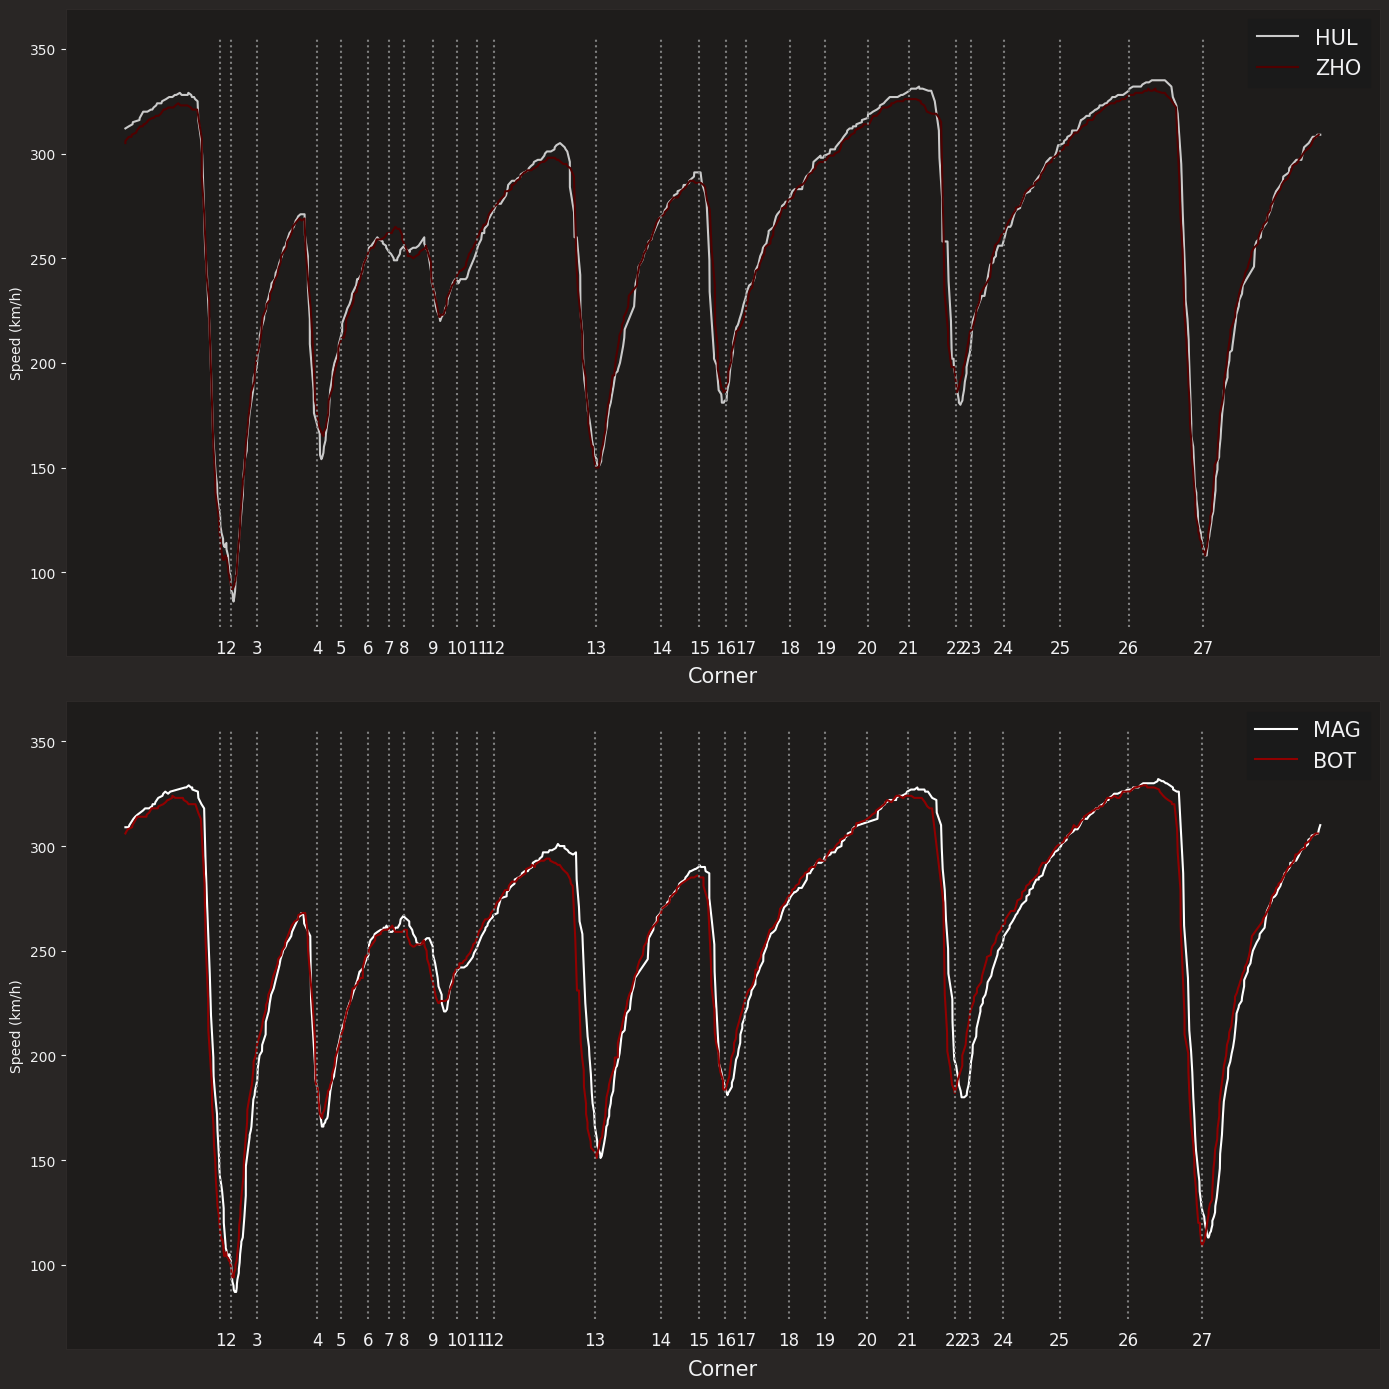

In [41]:
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

for drv in drivers_3[0:2]:
    ax[0].plot(drivers_3_car[drv]['Distance'], drivers_3_car[drv]['Speed'],
               color=fastf1.plotting.driver_color(drv), label=drv, linewidth=1.5)

for drv in drivers_3[2:4]:
    ax[1].plot(drivers_3_car[drv]['Distance'], drivers_3_car[drv]['Speed'],
               color=fastf1.plotting.driver_color(drv), label=drv, linewidth=1.5)

v_min = drivers_3_car['BOT']['Speed'].min()
v_max = drivers_3_car['HUL']['Speed'].max()

ax[0].vlines(x=circuit_info.corners['Distance'], ymin=v_min-20,
             ymax=v_max+20, linestyles='dotted', colors='grey')
ax[1].vlines(x=circuit_info.corners['Distance'], ymin=v_min-20,
             ymax=v_max+20, linestyles='dotted', colors='grey')

for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax[0].text(corner['Distance'], v_min-30, txt,
               va='center', ha='center', size=12)
    ax[1].text(corner['Distance'], v_min-30, txt,
               va='center', ha='center', size=12)

ax[0].set_xlabel('Corner', size=15)
ax[1].set_xlabel('Corner', size=15)
ax[0].set_ylabel('Speed (km/h)')
ax[1].set_ylabel('Speed (km/h)')

ax[0].set_xticks([])
ax[1].set_xticks([])
plt.minorticks_off()

ax[0].legend(bbox_to_anchor=(1, 1), fontsize=15)
ax[1].legend(bbox_to_anchor=(1, 1), fontsize=15)
plt.tight_layout()
plt.show()


- Progresi speed haas dan alfa romeo cukup berimbang. Haas memiliki keunggulan top speed ketimbang Alfa romeo karena mereka melakukan "lift and coast" di saat masuk ke turn 1, 13, 22, dan 27 sehingga mereka melepas tekanan pada pedal gas lebih awal ketimbang haas dan tidak mencapai top speed sebelum tikungan.[Kotak kuning]
- Alfa romeo memiliki kecepatan yang lebih tinggi saat berada di tikungan hingga saat keluar dari tikungan [kotak biru] sehingga mereka memiliki kecepatan yang lebih tinggi ketimbang haas di setengah lurusan [panah kuning]

In [42]:
for drv in drivers_3[0:2]:
    drivers_3_car[drv]['Driver'] = drv
    
telemetry_hul = drivers_3_car['HUL']
telemetry_zho = drivers_3_car['ZHO']

telemetry = pd.concat([telemetry_hul, telemetry_zho])
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver
2,2023-03-18 17:38:56.428,0 days 00:53:56.324000,,1238.312222,0 days 00:00:00,11142,312,8,100,False,12,interpolation,0.000006,OnTrack,-1301,242,117,0.000000,HUL
3,2023-03-18 17:38:56.629,0 days 00:53:56.525000,,1238.312222,0 days 00:00:00.201000,11164,313,8,100,False,12,pos,0.002868,OnTrack,-1361,409,118,17.475833,HUL
4,2023-03-18 17:38:56.849,0 days 00:53:56.745000,,1238.312222,0 days 00:00:00.421000,11207,314,8,100,False,12,pos,0.006008,OnTrack,-1446,638,118,36.664722,HUL
5,2023-03-18 17:38:56.867,0 days 00:53:56.763000,,1238.312222,0 days 00:00:00.439000,11250,315,8,100,False,12,car,0.006266,OnTrack,-1452,656,117,38.239722,HUL
6,2023-03-18 17:38:57.249,0 days 00:53:57.145000,,1238.312222,0 days 00:00:00.821000,11294,316,8,100,False,12,pos,0.011744,OnTrack,-1580,1003,117,71.770833,HUL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,2023-03-18 17:40:00.468,0 days 00:55:00.364000,81,267.201389,0 days 00:01:28.763000,10768,302,8,100,False,12,car,0.984358,OnTrack,-1105,-328,118,6051.431111,ZHO
678,2023-03-18 17:40:00.609,0 days 00:55:00.505000,81,267.201389,0 days 00:01:28.904000,10798,303,8,100,False,12,pos,0.986289,OnTrack,-1142,-216,118,6063.298611,ZHO
679,2023-03-18 17:40:00.708,0 days 00:55:00.604000,81,267.201389,0 days 00:01:29.003000,10828,304,8,100,False,12,car,0.987651,OnTrack,-1168,-136,117,6071.658611,ZHO
680,2023-03-18 17:40:00.849,0 days 00:55:00.745000,81,267.201389,0 days 00:01:29.144000,10934,307,8,100,False,12,pos,0.989600,OnTrack,-1207,-24,118,6083.682778,ZHO


In [43]:
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )

)
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector
2,2023-03-18 17:38:56.428,0 days 00:53:56.324000,,1238.312222,0 days 00:00:00,11142,312,8,100,False,12,interpolation,0.000006,OnTrack,-1301,242,117,0.000000,HUL,1
3,2023-03-18 17:38:56.629,0 days 00:53:56.525000,,1238.312222,0 days 00:00:00.201000,11164,313,8,100,False,12,pos,0.002868,OnTrack,-1361,409,118,17.475833,HUL,1
4,2023-03-18 17:38:56.849,0 days 00:53:56.745000,,1238.312222,0 days 00:00:00.421000,11207,314,8,100,False,12,pos,0.006008,OnTrack,-1446,638,118,36.664722,HUL,1
5,2023-03-18 17:38:56.867,0 days 00:53:56.763000,,1238.312222,0 days 00:00:00.439000,11250,315,8,100,False,12,car,0.006266,OnTrack,-1452,656,117,38.239722,HUL,1
6,2023-03-18 17:38:57.249,0 days 00:53:57.145000,,1238.312222,0 days 00:00:00.821000,11294,316,8,100,False,12,pos,0.011744,OnTrack,-1580,1003,117,71.770833,HUL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,2023-03-18 17:40:00.468,0 days 00:55:00.364000,81,267.201389,0 days 00:01:28.763000,10768,302,8,100,False,12,car,0.984358,OnTrack,-1105,-328,118,6051.431111,ZHO,25
678,2023-03-18 17:40:00.609,0 days 00:55:00.505000,81,267.201389,0 days 00:01:28.904000,10798,303,8,100,False,12,pos,0.986289,OnTrack,-1142,-216,118,6063.298611,ZHO,25
679,2023-03-18 17:40:00.708,0 days 00:55:00.604000,81,267.201389,0 days 00:01:29.003000,10828,304,8,100,False,12,car,0.987651,OnTrack,-1168,-136,117,6071.658611,ZHO,25
680,2023-03-18 17:40:00.849,0 days 00:55:00.745000,81,267.201389,0 days 00:01:29.144000,10934,307,8,100,False,12,pos,0.989600,OnTrack,-1207,-24,118,6083.682778,ZHO,25


In [44]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,HUL,320.736842
1,1,ZHO,314.130435
2,2,HUL,250.774194
3,2,ZHO,240.833333
4,3,HUL,138.250000
5,3,ZHO,136.377778
6,4,HUL,245.241379
7,4,ZHO,241.259259
8,5,HUL,204.903226
9,5,ZHO,202.500000


In [45]:
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'FastestDriver'})
fastest_driver

,Minisector,FastestDriver
0,1,HUL
2,2,HUL
4,3,HUL
6,4,HUL
8,5,HUL
11,6,ZHO
12,7,HUL
15,8,ZHO
16,9,HUL
18,10,HUL


In [46]:
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])
telemetry = telemetry.sort_values(by=['Distance'])
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector,FastestDriver
0,2023-03-18 17:38:56.428,0 days 00:53:56.324000,,1238.312222,0 days 00:00:00,11142,312,8,100,False,...,interpolation,0.000006,OnTrack,-1301,242,117,0.000000,HUL,1,HUL
19,2023-03-18 17:38:31.705,0 days 00:53:31.601000,,279.705556,0 days 00:00:00,10865,305,8,100,False,...,interpolation,0.000012,OnTrack,-1294,223,117,0.000000,ZHO,1,HUL
20,2023-03-18 17:38:31.707,0 days 00:53:31.603000,,279.705556,0 days 00:00:00.002000,10871,306,8,100,False,...,car,0.000040,OnTrack,-1295,225,117,0.170000,ZHO,1,HUL
21,2023-03-18 17:38:31.907,0 days 00:53:31.803000,81,279.705556,0 days 00:00:00.202000,10929,308,8,100,False,...,car,0.002820,OnTrack,-1358,399,117,17.281111,ZHO,1,HUL
1,2023-03-18 17:38:56.629,0 days 00:53:56.525000,,1238.312222,0 days 00:00:00.201000,11164,313,8,100,False,...,pos,0.002868,OnTrack,-1361,409,118,17.475833,HUL,1,HUL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,2023-03-18 17:40:00.849,0 days 00:55:00.745000,81,267.201389,0 days 00:01:29.144000,10934,307,8,100,False,...,pos,0.989600,OnTrack,-1207,-24,118,6083.682778,ZHO,25,HUL
1330,2023-03-18 17:40:25.629,0 days 00:55:25.525000,77,877.837222,0 days 00:01:29.201000,10995,308,8,100,False,...,pos,0.993841,OnTrack,-1227,33,118,6096.898889,HUL,25,HUL
1331,2023-03-18 17:40:25.707,0 days 00:55:25.603000,77,874.259444,0 days 00:01:29.279000,11003,309,8,100,False,...,car,0.994933,OnTrack,-1253,107,117,6103.593889,HUL,25,HUL
1355,2023-03-18 17:40:01.166,0 days 00:55:01.062000,81,267.201389,0 days 00:01:29.461000,10987,309,8,100,False,...,interpolation,0.994023,OnTrack,-1292,223,119,6110.891944,ZHO,25,HUL


In [47]:
telemetry.loc[telemetry['FastestDriver'] == 'HUL', 'FastestDriverInt'] = 1
telemetry.loc[telemetry['FastestDriver'] == 'ZHO', 'FastestDriverInt'] = 2
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector,FastestDriver,FastestDriverInt
0,2023-03-18 17:38:56.428,0 days 00:53:56.324000,,1238.312222,0 days 00:00:00,11142,312,8,100,False,...,0.000006,OnTrack,-1301,242,117,0.000000,HUL,1,HUL,1.0
19,2023-03-18 17:38:31.705,0 days 00:53:31.601000,,279.705556,0 days 00:00:00,10865,305,8,100,False,...,0.000012,OnTrack,-1294,223,117,0.000000,ZHO,1,HUL,1.0
20,2023-03-18 17:38:31.707,0 days 00:53:31.603000,,279.705556,0 days 00:00:00.002000,10871,306,8,100,False,...,0.000040,OnTrack,-1295,225,117,0.170000,ZHO,1,HUL,1.0
21,2023-03-18 17:38:31.907,0 days 00:53:31.803000,81,279.705556,0 days 00:00:00.202000,10929,308,8,100,False,...,0.002820,OnTrack,-1358,399,117,17.281111,ZHO,1,HUL,1.0
1,2023-03-18 17:38:56.629,0 days 00:53:56.525000,,1238.312222,0 days 00:00:00.201000,11164,313,8,100,False,...,0.002868,OnTrack,-1361,409,118,17.475833,HUL,1,HUL,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,2023-03-18 17:40:00.849,0 days 00:55:00.745000,81,267.201389,0 days 00:01:29.144000,10934,307,8,100,False,...,0.989600,OnTrack,-1207,-24,118,6083.682778,ZHO,25,HUL,1.0
1330,2023-03-18 17:40:25.629,0 days 00:55:25.525000,77,877.837222,0 days 00:01:29.201000,10995,308,8,100,False,...,0.993841,OnTrack,-1227,33,118,6096.898889,HUL,25,HUL,1.0
1331,2023-03-18 17:40:25.707,0 days 00:55:25.603000,77,874.259444,0 days 00:01:29.279000,11003,309,8,100,False,...,0.994933,OnTrack,-1253,107,117,6103.593889,HUL,25,HUL,1.0
1355,2023-03-18 17:40:01.166,0 days 00:55:01.062000,81,267.201389,0 days 00:01:29.461000,10987,309,8,100,False,...,0.994023,OnTrack,-1292,223,119,6110.891944,ZHO,25,HUL,1.0


In [48]:
condition = telemetry['FastestDriverInt'] == 1
count = len(telemetry[condition])

total_rows = len(telemetry)
percentage = (count/total_rows) * 100
percentage

69.78629329403095

-2.731418918918919


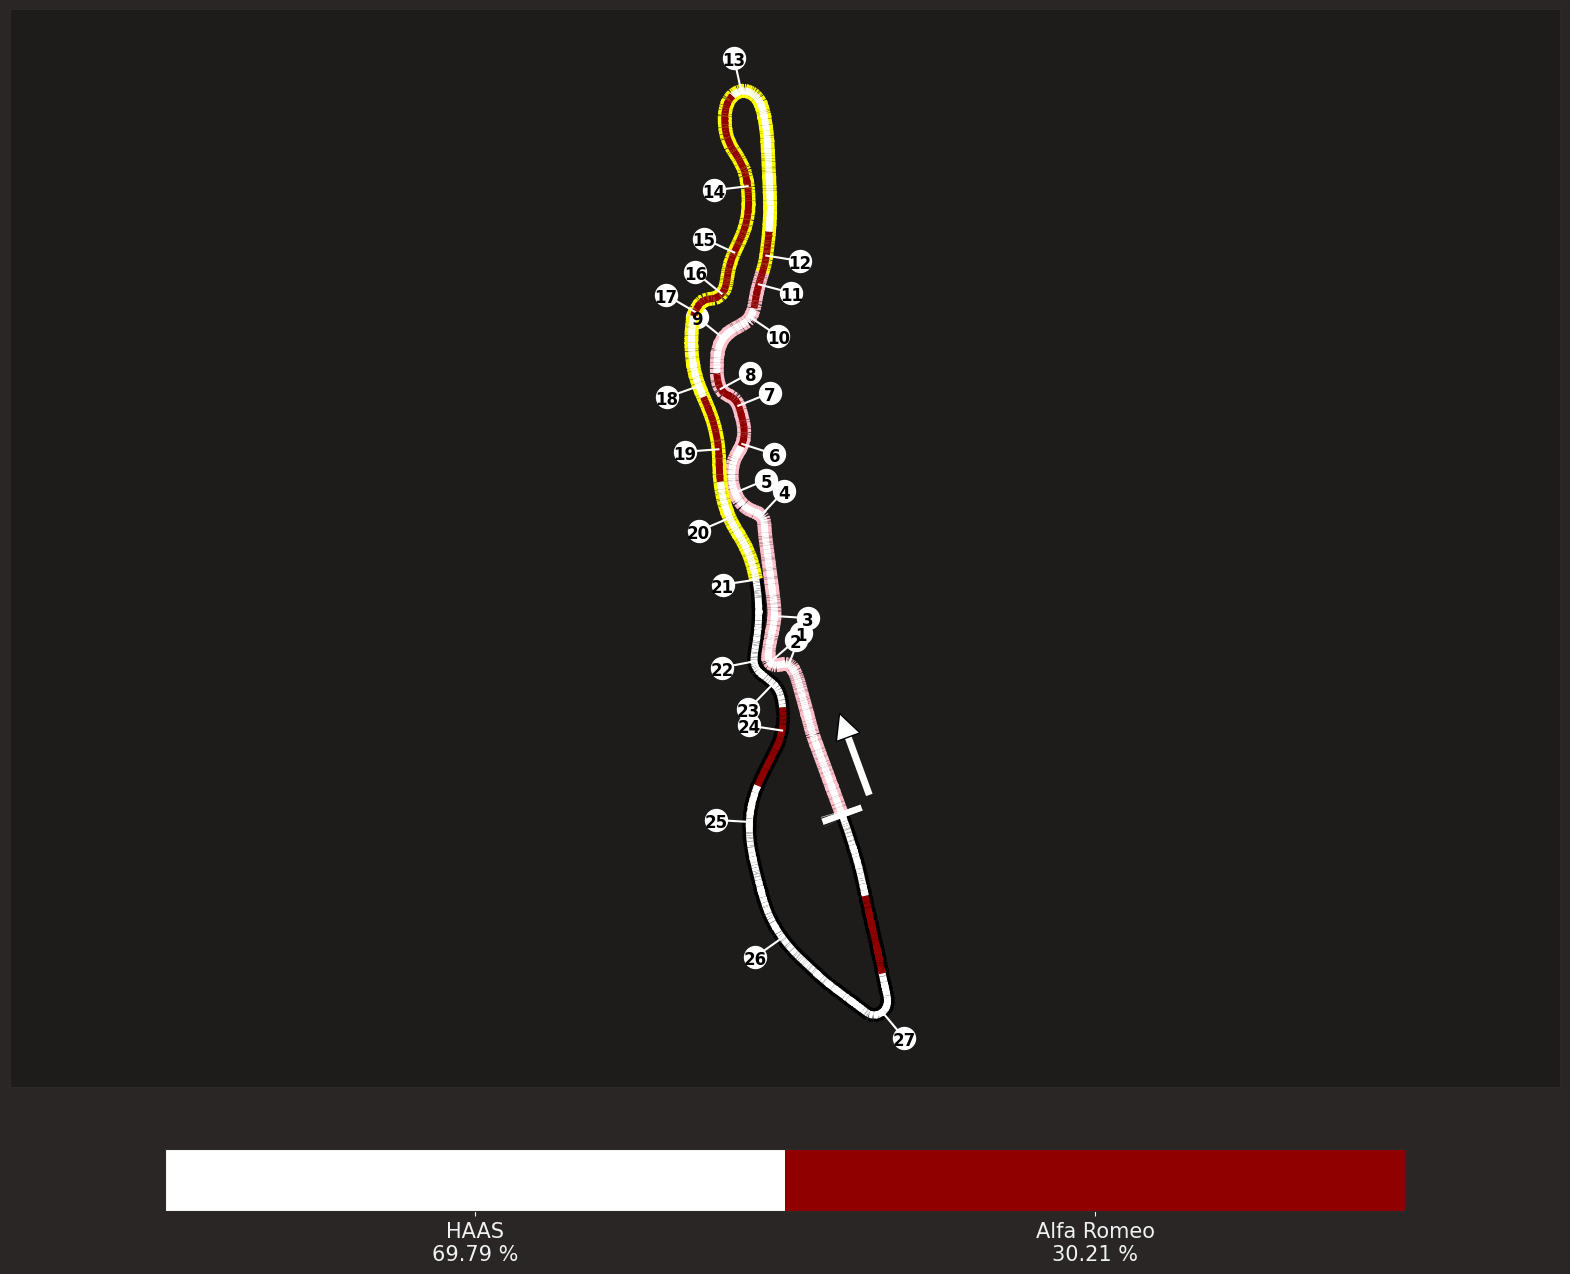

In [49]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

custom_colors1 = ['#ffffff', '#900000']
custom_cmap1 = ListedColormap(custom_colors1)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['FastestDriverInt'].to_numpy().astype(float)

sector123 = segments.size // 4
part_size = sector123 // 3
part_size

start_1, end_1 = 0, part_size
start_2, end_2 = part_size, 2 * part_size
start_3, end_3 = 2 * part_size, sector123

lc_comp = LineCollection(segments, norm=plt.Normalize(1, custom_cmap1.N+1), cmap=custom_cmap1)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

start_line = LineCollection(segments[0:5])
start_line.set_linewidth(30)
start_line.set_color('white')

sector1 = LineCollection(segments[start_1:end_1])
sector1.set_linewidth(10)
sector1.set_color('pink')

sector2 = LineCollection(segments[start_2:end_2])
sector2.set_linewidth(10)
sector2.set_color('yellow')

sector3 = LineCollection(segments[start_3:end_3])
sector3.set_linewidth(10)
sector3.set_color('black')

arrow_line = Line2D([x[0]+750, x[30]+750], [y[0]+750, y[30]+750], color='white', label='Diagonal Line', linewidth=5)

plt.rcParams['figure.figsize'] = [20, 20]

plt.gca().add_line(arrow_line)
plt.gca().add_collection(sector1)
plt.gca().add_collection(sector2)
plt.gca().add_collection(sector3)
plt.gca().add_collection(lc_comp)
plt.gca().add_collection(start_line)

offset_vector = [1000, 0]

for _, corner in circuit_info.corners.iterrows():

    txt = f"{corner['Number']}{corner['Letter']}"

    offset_angle = corner['Angle'] / 180 * np.pi

    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    track_x, track_y = ([corner['X'], corner['Y']])

    plt.scatter(text_x, text_y, color='white', s=250)

    plt.plot([track_x, text_x], [track_y, text_y], color='white')

    plt.text(text_x, text_y, txt, va='center_baseline', ha='center', size='12', color='black', weight='bold')


plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)


slope = (y[30] - y[0]) / (x[30] - x[0])
print(slope)
angle = np.arctan(slope)
angle_degrees = np.degrees(angle)

plt.arrow(x[30]+750, y[30]+750, -(0.1 * np.cos(angle)), -(0.1 * np.sin(angle)), head_width=750, head_length=750, fc='white', ec='black', zorder=2)


cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 4), location='bottom', shrink=0.8, anchor=(0.5, 2))
cbar.set_ticks(np.arange(1.5, 3.5))
cbar.set_ticklabels([f"HAAS\n"f"{round(percentage, 2)} %", f"Alfa Romeo\n"f"{round(100-percentage, 2)} %"], size=15)

plt.show()

In [50]:
qf_list = ['Driver', 'LapTime', 'Stint', 'LapNumber', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'TyreLife', 'SpeedST', 'FreshTyre']
a = pd.concat([drivers_3_lap['HUL'][qf_list], drivers_3_lap['ZHO'][qf_list]], keys=['HUL', 'ZHO'], axis=1)

sector1delta = abs(a['HUL']['Sector1Time'] - a['ZHO']['Sector1Time'])
sector2delta = abs(a['HUL']['Sector2Time'] - a['ZHO']['Sector2Time'])
sector3delta = abs(a['HUL']['Sector3Time'] - a['ZHO']['Sector3Time'])

print(f"Sector 1 Delta: {sector1delta}")
print(f"Sector 2 Delta: {sector2delta}")
print(f"Sector 3 Delta: {sector3delta}")

a


Sector 1 Delta: 0 days 00:00:00.029000
Sector 2 Delta: 0 days 00:00:00.063000
Sector 3 Delta: 0 days 00:00:00.024000


,HUL,ZHO
Driver,HUL,ZHO
LapTime,0 days 00:01:29.451000,0 days 00:01:29.461000
Stint,4.0,4.0
LapNumber,17.0,17.0
Sector1Time,0 days 00:00:32.657000,0 days 00:00:32.628000
Sector2Time,0 days 00:00:28.239000,0 days 00:00:28.302000
Sector3Time,0 days 00:00:28.555000,0 days 00:00:28.531000
SpeedI1,291.0,289.0
SpeedI2,330.0,321.0
SpeedFL,307.0,303.0


- Haas tercepat dan Alfa Romeo tercepat hanya memiliki perbedaan 0.01 detik
- Haas milik nico hulkenberg menguasai 69.79% bagian track sedangkan zhou hanya menguasai 30.21%
- zhou tetap bisa mencatatkan waktu lebih baik di sektor 1 dan 3 ketimbang hulkenberg, walaupun pada sector 2 terpaut cukup jauh dengan hulkenberg
- speed milik zhou saat keluar dari tikungan sangat membantunya untuk mendapatkan selisih waktu yang tipis dengan hulkenberg, sementara itu hulkenberg menguasai seluruh lurusan panjang di track berkat top speed mobilnya dan ban yang berbeda 1 lap dengan milik zhou.

# Race Day

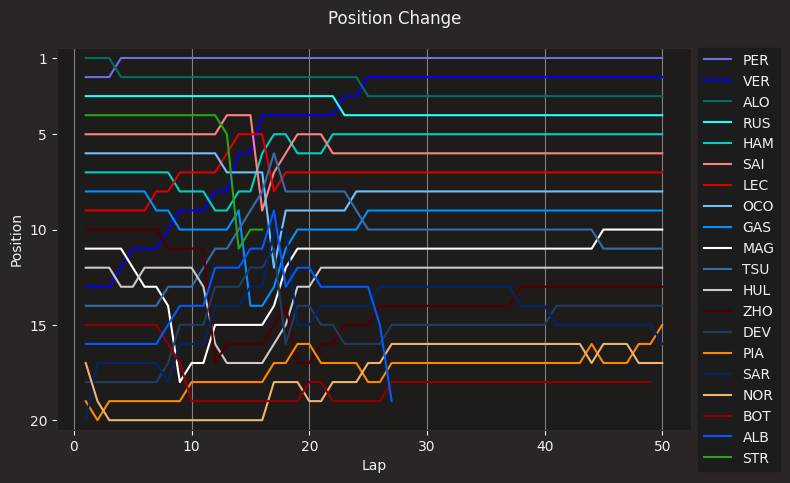

In [63]:
fig, ax = plt.subplots(figsize=(8.0, 4.9))

for drv in session_r.drivers:
    drv_laps = session_r.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    color = fastf1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color)
    
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')
ax.grid(which='major', color='grey', axis='x')

plt.suptitle('Position Change')
ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()
plt.show()

In [52]:
per_laps = session_r.laps.pick_driver('PER').pick_quicklaps().reset_index()
ver_laps = session_r.laps.pick_driver('VER').pick_quicklaps().reset_index()
alo_laps = session_r.laps.pick_driver('ALO').pick_quicklaps().reset_index()

In [53]:
per_lapss = session_r.laps.pick_driver('PER').reset_index()
ver_lapss = session_r.laps.pick_driver('VER').reset_index()
alo_lapss = session_r.laps.pick_driver('ALO').reset_index()

In [54]:
pit_time = session_r.laps[['Compound', 'Stint', 'LapNumber', 'Driver', 'PitInTime', 'LapTime', 'Position']]
a = pit_time.loc[(pd.notna(pit_time['PitInTime'])) & (pit_time['Driver'] == 'PER' )]
b = pit_time.loc[(pd.notna(pit_time['PitInTime'])) & (pit_time['Driver'] == 'VER' )]
c = pit_time.loc[(pd.notna(pit_time['PitInTime'])) & (pit_time['Driver'] == 'ALO' )]
e = pd.concat([a, b, c])
e

,Compound,Stint,LapNumber,Driver,PitInTime,LapTime,Position
117,MEDIUM,1.0,18.0,PER,0 days 01:31:46.882000,0 days 00:02:07.357000,1.0
17,MEDIUM,1.0,18.0,VER,0 days 01:32:15.366000,0 days 00:02:14.348000,4.0
167,MEDIUM,1.0,18.0,ALO,0 days 01:31:55.100000,0 days 00:02:09.623000,2.0


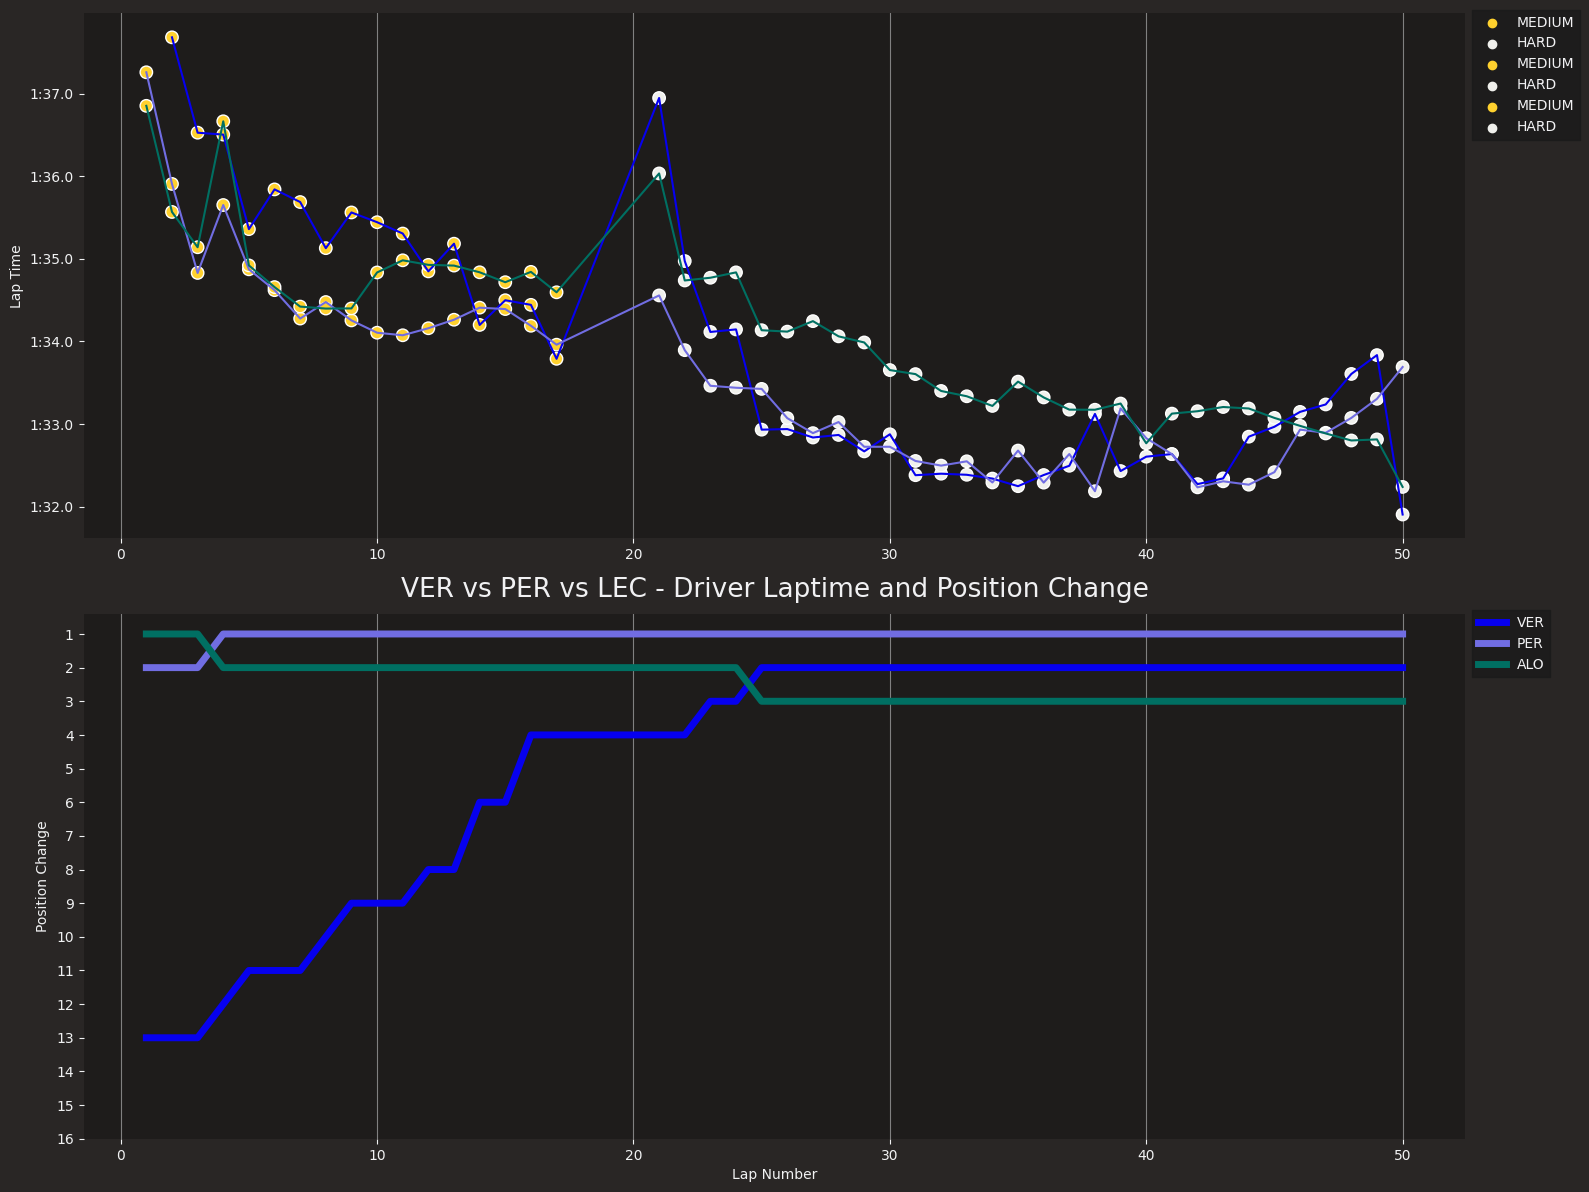

In [55]:
#### import seaborn as sns
fig, ax= plt.subplots(2, 1, figsize=(16,12))

sns.scatterplot(data=ver_laps, 
                x='LapNumber', 
                y='LapTime', 
                ax=ax[0], 
                hue='Compound', 
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=1)
sns.scatterplot(data=per_laps, 
                x='LapNumber', 
                y='LapTime', 
                ax=ax[0], 
                hue='Compound', 
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=1)
sns.scatterplot(data=alo_laps, 
                x='LapNumber', 
                y='LapTime', 
                ax=ax[0], 
                hue='Compound', 
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=1)
sns.lineplot(data=ver_laps,
             x='LapNumber',
             y='LapTime',
             ax=ax[0],
             color=fastf1.plotting.driver_color('VER')
            )
sns.lineplot(data=per_laps,
             x='LapNumber',
             y='LapTime',
             ax=ax[0],
             color=fastf1.plotting.driver_color('PER')
            )
sns.lineplot(data=alo_laps,
             x='LapNumber',
             y='LapTime',
             ax=ax[0],
             color=fastf1.plotting.driver_color('ALO')
            )

ax[1].plot(ver_lapss['LapNumber'], ver_lapss['Position'],
            label='VER', color=fastf1.plotting.driver_color('VER'), linewidth=5)
ax[1].plot(per_lapss['LapNumber'], per_lapss['Position'],
            label='PER', color=fastf1.plotting.driver_color('PER'), linewidth=5)
ax[1].plot(alo_lapss['LapNumber'], alo_lapss['Position'],
            label='ALO', color=fastf1.plotting.driver_color('ALO'), linewidth=5)

ax[0].invert_yaxis()
ax[0].set_xlabel('')
ax[0].set_ylabel('Lap Time')

ax[1].invert_yaxis()
ax[1].set_xlabel('Lap Number')
ax[1].set_ylabel('Position Change')
ax[1].set_yticks(np.arange(1, 17, step=1))

plt.title(f'VER vs PER vs LEC - Driver Laptime and Position Change')
ax[0].grid(color='grey', which='major', axis='x')
ax[1].grid(color='grey', which='major', axis='x')
sns.despine(left=True, bottom=True)

ax[0].legend(loc='upper left', bbox_to_anchor=(1.0, 1.02))
ax[1].legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()
plt.show()

- verstappen start dari posisi 15 dan sudah mengambil posisi 13 dari lap 1, alonso juga menyusul perez di tikungan pertama lap 1 dan mengambil alih posisi 1
- pace alonso dan perez seimbang selama stint awal balapan dan keduanya juga menggunakan ban medium. (panah kuning)
- di lap 3, alonso disusul oleh perez
- beberapa pembalap melakukan pit stop sejak lap 12. verstappen melakukan strategi overcut dengan ban lamanya sehingga ia berhasil menyusul pembalap lain untuk meraih posisi 3.
- pada lap 17, safety car muncul karena lance stroll DNF dan mobilnya berhenti di turn 13. Perez, verstappen, alonso memanfaatkannya dengan masuk ke pit dan mengganti ke ban hard
- sejak ketiga pembalap ini menggunakan ban hard, terlihat perbedaan lap time antara pembalap red bull dan alonso yang mengendarai aston martin. Selanjutnya alonso pun disusul oleh vertappen. (panah merah)
- verstappen meraih fastest lap di lap 50 sehingga ia berhak mendapat bonus 1 poin 

# Team Race Pace

In [56]:
laps = session_r.laps.pick_quicklaps()
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 01:06:13.831000,VER,1,0 days 00:01:37.680000,2.0,1.0,NaT,NaT,0 days 00:00:36.595000,0 days 00:00:30.654000,...,True,Red Bull Racing,0 days 01:04:36.151000,2023-03-19 17:05:36.237,1,13.0,False,,False,True
2,0 days 01:07:50.357000,VER,1,0 days 00:01:36.526000,3.0,1.0,NaT,NaT,0 days 00:00:36.020000,0 days 00:00:30.417000,...,True,Red Bull Racing,0 days 01:06:13.831000,2023-03-19 17:07:13.917,1,13.0,False,,False,True
3,0 days 01:09:26.860000,VER,1,0 days 00:01:36.503000,4.0,1.0,NaT,NaT,0 days 00:00:36.021000,0 days 00:00:30.177000,...,True,Red Bull Racing,0 days 01:07:50.357000,2023-03-19 17:08:50.443,1,12.0,False,,False,True
4,0 days 01:11:02.219000,VER,1,0 days 00:01:35.359000,5.0,1.0,NaT,NaT,0 days 00:00:35.096000,0 days 00:00:30.116000,...,True,Red Bull Racing,0 days 01:09:26.860000,2023-03-19 17:10:26.946,1,11.0,True,TRACK LIMITS AT TURN 23 LAP 5,False,True
5,0 days 01:12:38.059000,VER,1,0 days 00:01:35.840000,6.0,1.0,NaT,NaT,0 days 00:00:35.547000,0 days 00:00:30.100000,...,True,Red Bull Racing,0 days 01:11:02.219000,2023-03-19 17:12:02.305,1,11.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0 days 02:19:13.139000,PIA,81,0 days 00:01:34.467000,46.0,2.0,NaT,NaT,0 days 00:00:35.037000,0 days 00:00:29.757000,...,True,McLaren,0 days 02:17:38.672000,2023-03-19 18:18:38.758,1,17.0,False,,False,True
939,0 days 02:20:47.648000,PIA,81,0 days 00:01:34.509000,47.0,2.0,NaT,NaT,0 days 00:00:35.003000,0 days 00:00:29.835000,...,True,McLaren,0 days 02:19:13.139000,2023-03-19 18:20:13.225,1,17.0,False,,False,True
940,0 days 02:22:21.935000,PIA,81,0 days 00:01:34.287000,48.0,2.0,NaT,NaT,0 days 00:00:34.907000,0 days 00:00:29.686000,...,True,McLaren,0 days 02:20:47.648000,2023-03-19 18:21:47.734,1,16.0,False,,False,True
941,0 days 02:23:56.226000,PIA,81,0 days 00:01:34.291000,49.0,2.0,NaT,NaT,0 days 00:00:34.952000,0 days 00:00:29.607000,...,True,McLaren,0 days 02:22:21.935000,2023-03-19 18:23:22.021,1,16.0,False,,False,True


In [57]:
transformed_laps = laps.copy()
transformed_laps.loc[:,'LapTime (s)'] = laps['LapTime'].dt.total_seconds()

print(transformed_laps.loc[:,'LapTime (s)'])
transformed_laps

1      97.680
2      96.526
3      96.503
4      95.359
5      95.840
        ...  
938    94.467
939    94.509
940    94.287
941    94.291
942    94.618
Name: LapTime (s), Length: 817, dtype: float64


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTime (s)
1,0 days 01:06:13.831000,VER,1,0 days 00:01:37.680000,2.0,1.0,NaT,NaT,0 days 00:00:36.595000,0 days 00:00:30.654000,...,Red Bull Racing,0 days 01:04:36.151000,2023-03-19 17:05:36.237,1,13.0,False,,False,True,97.680
2,0 days 01:07:50.357000,VER,1,0 days 00:01:36.526000,3.0,1.0,NaT,NaT,0 days 00:00:36.020000,0 days 00:00:30.417000,...,Red Bull Racing,0 days 01:06:13.831000,2023-03-19 17:07:13.917,1,13.0,False,,False,True,96.526
3,0 days 01:09:26.860000,VER,1,0 days 00:01:36.503000,4.0,1.0,NaT,NaT,0 days 00:00:36.021000,0 days 00:00:30.177000,...,Red Bull Racing,0 days 01:07:50.357000,2023-03-19 17:08:50.443,1,12.0,False,,False,True,96.503
4,0 days 01:11:02.219000,VER,1,0 days 00:01:35.359000,5.0,1.0,NaT,NaT,0 days 00:00:35.096000,0 days 00:00:30.116000,...,Red Bull Racing,0 days 01:09:26.860000,2023-03-19 17:10:26.946,1,11.0,True,TRACK LIMITS AT TURN 23 LAP 5,False,True,95.359
5,0 days 01:12:38.059000,VER,1,0 days 00:01:35.840000,6.0,1.0,NaT,NaT,0 days 00:00:35.547000,0 days 00:00:30.100000,...,Red Bull Racing,0 days 01:11:02.219000,2023-03-19 17:12:02.305,1,11.0,False,,False,True,95.840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0 days 02:19:13.139000,PIA,81,0 days 00:01:34.467000,46.0,2.0,NaT,NaT,0 days 00:00:35.037000,0 days 00:00:29.757000,...,McLaren,0 days 02:17:38.672000,2023-03-19 18:18:38.758,1,17.0,False,,False,True,94.467
939,0 days 02:20:47.648000,PIA,81,0 days 00:01:34.509000,47.0,2.0,NaT,NaT,0 days 00:00:35.003000,0 days 00:00:29.835000,...,McLaren,0 days 02:19:13.139000,2023-03-19 18:20:13.225,1,17.0,False,,False,True,94.509
940,0 days 02:22:21.935000,PIA,81,0 days 00:01:34.287000,48.0,2.0,NaT,NaT,0 days 00:00:34.907000,0 days 00:00:29.686000,...,McLaren,0 days 02:20:47.648000,2023-03-19 18:21:47.734,1,16.0,False,,False,True,94.287
941,0 days 02:23:56.226000,PIA,81,0 days 00:01:34.291000,49.0,2.0,NaT,NaT,0 days 00:00:34.952000,0 days 00:00:29.607000,...,McLaren,0 days 02:22:21.935000,2023-03-19 18:23:22.021,1,16.0,False,,False,True,94.291


In [58]:
team_order = (transformed_laps[['Team', 'LapTime (s)']]
              .groupby('Team')
              .median()['LapTime (s)']
              .sort_values()
              .index)
print(team_order)

team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}
print(team_palette)

Index(['Red Bull Racing', 'Mercedes', 'Ferrari', 'Aston Martin', 'Alpine',
       'Haas F1 Team', 'McLaren', 'AlphaTauri', 'Alfa Romeo', 'Williams'],
      dtype='object', name='Team')
{'Red Bull Racing': '#0600ef', 'Mercedes': '#00d2be', 'Ferrari': '#dc0000', 'Aston Martin': '#006f62', 'Alpine': '#0090ff', 'Haas F1 Team': '#ffffff', 'McLaren': '#ff8700', 'AlphaTauri': '#2b4562', 'Alfa Romeo': '#900000', 'Williams': '#005aff'}


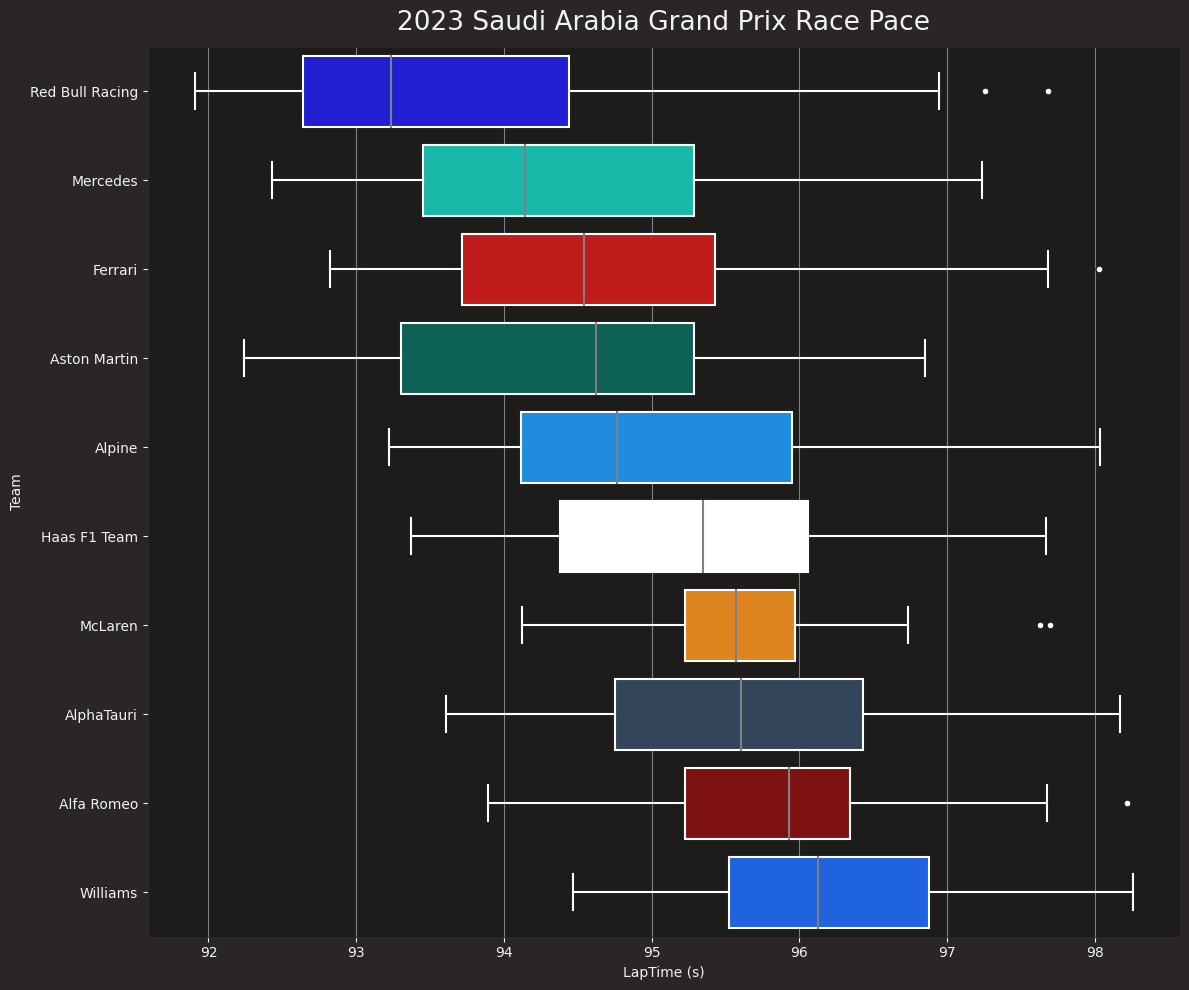

In [59]:
fig, ax = plt.subplots(figsize=(12, 10))
outlier_props = dict(markerfacecolor='white', marker='o')

bxp = sns.boxplot(data=transformed_laps,
             x='LapTime (s)',
             y='Team',
             order=team_order,
             palette=team_palette,
             whiskerprops=dict(color='white'),
             boxprops=dict(edgecolor='white'),
             medianprops=dict(color='grey'),
             capprops=dict(color='white'),
             flierprops=outlier_props 
            )

plt.title('2023 Saudi Arabia Grand Prix Race Pace')
plt.grid(color='grey', which='major', axis='x')

plt.tight_layout()
plt.show()

In [60]:
data_list = []
i=0
for index in team_order:
    q1 = bxp.findobj(plt.Line2D)[i+0].get_xdata()[0]
    q3 = bxp.findobj(plt.Line2D)[i+1].get_xdata()[0]
    _min = bxp.findobj(plt.Line2D)[i+2].get_xdata()[0]
    _max = bxp.findobj(plt.Line2D)[i+3].get_xdata()[0]
    med = bxp.findobj(plt.Line2D)[i+4].get_xdata()[0]
    mean = transformed_laps.loc[transformed_laps['Team'] == index]['LapTime (s)'].mean()
    i+=6
    
    team_data = {
        'Team': index,
        'Q1': q1,
        'Q3': q3,
        'Min': _min,
        'Max': _max,
        'Median': med,
        'Mean': mean
    }
    
    data_list.append(team_data)
    
df = pd.DataFrame(data_list)
df['IQR'] = df['Q3']-df['Q1']
df['Range'] = df['Max']-df['Min']
df['Skewness'] = 'Positive'
df.loc[(df['Median'] > df['Mean']), 'Skewness'] = 'Negative'


In [65]:
df = df.sort_values(by='Median').round(3)
df

,Team,Q1,Q3,Min,Max,Median,Mean,IQR,Range,Skewness
0,Red Bull Racing,92.638,94.443,91.906,96.946,93.238,93.692,1.805,5.040,Positive
1,Mercedes,93.452,95.287,92.433,97.234,94.142,94.456,1.835,4.801,Positive
2,Ferrari,93.713,95.428,92.822,97.681,94.539,94.676,1.715,4.859,Positive
3,Aston Martin,93.304,95.290,92.240,96.851,94.626,94.462,1.986,4.611,Negative
4,Alpine,94.115,95.947,93.222,98.033,94.762,95.044,1.832,4.811,Positive
5,Haas F1 Team,94.382,96.056,93.374,97.670,95.348,95.343,1.674,4.296,Negative
6,McLaren,95.228,95.973,94.122,96.735,95.574,95.597,0.745,2.613,Positive
7,AlphaTauri,94.751,96.431,93.609,98.171,95.604,95.580,1.680,4.562,Negative
8,Alfa Romeo,95.228,96.345,93.894,97.674,95.928,95.787,1.117,3.780,Negative
9,Williams,95.526,96.880,94.469,98.259,96.126,96.139,1.355,3.790,Positive


- Mclaren menjadi tim dengan konsistensi race pace terbaik dengan IQR 0.745 namun menjadi average race pacenya yang hanya 95.574 membuat mclaren menjadi urutan ke 7 dari 10 tim

- Selain mclaren, alfa romeo dan williams yang masing masing memiliki average race pace terburuk (peringkat 9 dan 10) menjadi tim dengan konsistensi race pace terbaik ke 2 dan 3. 

- Melihat hasil ini, cukup unik bahwa ketiga tim tersebut konsisten untuk tidak menghasilkan race pace lebih baik dari tim lain. Nilai Minimum dari ketiga tim tersebut juga merupakan nilai terendah jika dibandingkan tim lainnya. Nilai minimum ini memperlihatkan waktu tercepat yang dicapai oleh sebuah tim.

- red bull menjadi tim dengan average race pace terbaik dengan raihan waktu 93.238, selisih 0.904 dengan mercedes yang berada di posisi 2.

- Selain red bull dan mercedes, ferrari dan alpine juga memiliki average race pace terbaik ke 3 dan 5. Sehingga bukan hal yang aneh jika semua driver di 4 tim tersebut finish di top 10 secara berpasangan. selebihnya ada alonso yang berada di posisi 3 dan magnussen di posisi 10 yang melengkapi top 10 di balapan ini.

- aston martin kembali membuat kejutan di race ke 2. mempunyai average race pace terbaik ke 4 diantara tim lain dan juga terlihat dari boxplot bahwa aston martin memiliki skewness negatif jika dibandingkan dengan red bull, mercedes, dan ferrari yang memiliki skewness positif. 

- pada bidang motorsport, nilai lap time yang cepat lebih baik ketimbang nilai lap time yang lebih lama sehingga interpretasinya pun dibalikkan apabila dibandingkan dengan bidang lain.


# Emang boleh se upgrade itu, aston martin?

In [ ]:
session_r_2022 = fastf1.get_session(2022, 'Saudi Arabia', 'R')
session_r_2022.load()

In [67]:
am_2022 = session_r_2022.laps.pick_team('Aston Martin').pick_fastest()
am_2023 = session_r.laps.pick_team('Aston Martin').pick_fastest()
am_df = pd.concat([am_2022, am_2023], axis=1)
am_df


,479,199
Time,0 days 02:23:32.328000,0 days 02:24:26.568000
Driver,HUL,ALO
DriverNumber,27,14
LapTime,0 days 00:01:33.651000,0 days 00:01:32.240000
LapNumber,47.0,50.0
Stint,2.0,2.0
PitOutTime,NaT,NaT
PitInTime,NaT,NaT
Sector1Time,0 days 00:00:34.489000,0 days 00:00:33.731000
Sector2Time,0 days 00:00:29.807000,0 days 00:00:29.096000


- Aston mengalami perkembangan yang sangat signifikan, terlihat dari lap time tercepat yang diraih aston martin pada musim lalu dan musim ini.
- tahun ini, aston martin yang menggunakan ban hard dengan usia ban 33 lap pun dapat lebih cepat dibanding aston martin 2022 dengan ban medium berusia 11 lap. Perbedaan waktu pun mencapai 1.411 detik
- memiliki perbedaan 8 km/h saat melewati lurusan DRS sebelum tikungan akhir, perkembangan yang signifikan untuk sebuah tim f1
- apakah aston martin akan konsisten hingga akhir musim? masih ada 20 race lagi, kita lihat saja perkembangannya.

In [71]:
am2022_laps = session_r_2022.laps.pick_driver('HUL').pick_quicklaps().reset_index()
am2023_laps = session_r.laps.pick_driver('ALO').pick_quicklaps().reset_index()

In [72]:
am2022_lapss = session_r_2022.laps.pick_driver('HUL').reset_index()
am2023_lapss = session_r.laps.pick_driver('ALO').reset_index()

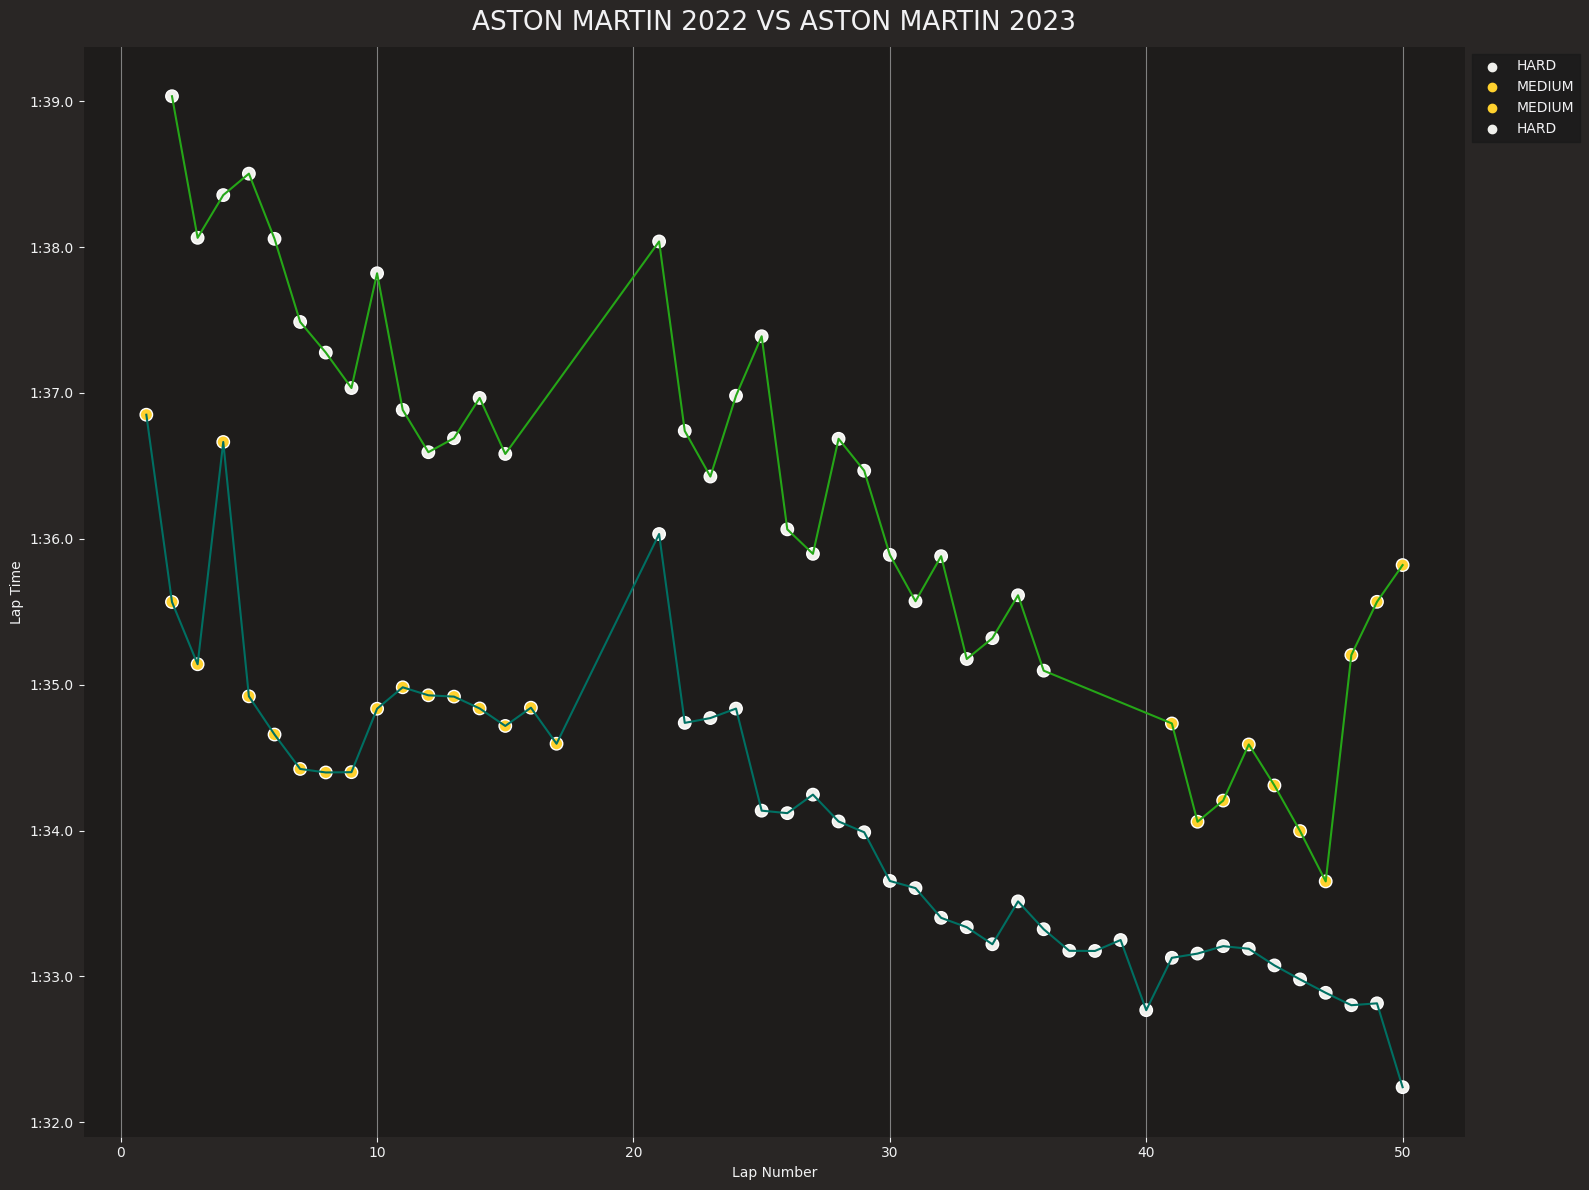

In [99]:
#### import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 12))

am2022line = sns.lineplot(data=am2022_laps,
                          x='LapNumber',
                          y='LapTime',
                          ax=ax,
                          color=fastf1.plotting.driver_color('STR')
                          )
am2023line = sns.lineplot(data=am2023_laps,
                          x='LapNumber',
                          y='LapTime',
                          ax=ax,
                          color=fastf1.plotting.driver_color('ALO'),
                          )
am2022 = sns.scatterplot(data=am2022_laps,
                         x='LapNumber',
                         y='LapTime',
                         ax=ax,
                         hue='Compound',
                         palette=fastf1.plotting.COMPOUND_COLORS,
                         s=80,
                         linewidth=1)
am2023 = sns.scatterplot(data=am2023_laps,
                         x='LapNumber',
                         y='LapTime',
                         ax=ax,
                         hue='Compound',
                         palette=fastf1.plotting.COMPOUND_COLORS,
                         s=80,
                         linewidth=1)


ax.invert_yaxis()
ax.set_xlabel('Lap Number')
ax.set_ylabel('Lap Time')

plt.title(f'ASTON MARTIN 2022 VS ASTON MARTIN 2023')
ax.grid(color='grey', which='major', axis='x')
sns.despine(left=True, bottom=True)

ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()


In [68]:
session_r.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
11,11,S PEREZ,PER,perez,Red Bull Racing,3671C6,red_bull,Sergio,Perez,Sergio Perez,...,,1.0,1,1.0,NaT,NaT,NaT,0 days 01:21:14.894000,Finished,25.0
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,,2.0,2,15.0,NaT,NaT,NaT,0 days 00:00:05.355000,Finished,19.0
14,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,,3.0,3,2.0,NaT,NaT,NaT,0 days 00:00:20.728000,Finished,15.0
63,63,G RUSSELL,RUS,russell,Mercedes,6CD3BF,mercedes,George,Russell,George Russell,...,,4.0,4,3.0,NaT,NaT,NaT,0 days 00:00:25.866000,Finished,12.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,6CD3BF,mercedes,Lewis,Hamilton,Lewis Hamilton,...,,5.0,5,7.0,NaT,NaT,NaT,0 days 00:00:31.065000,Finished,10.0
55,55,C SAINZ,SAI,sainz,Ferrari,F91536,ferrari,Carlos,Sainz,Carlos Sainz,...,,6.0,6,4.0,NaT,NaT,NaT,0 days 00:00:35.876000,Finished,8.0
16,16,C LECLERC,LEC,leclerc,Ferrari,F91536,ferrari,Charles,Leclerc,Charles Leclerc,...,,7.0,7,12.0,NaT,NaT,NaT,0 days 00:00:43.162000,Finished,6.0
31,31,E OCON,OCO,ocon,Alpine,2293D1,alpine,Esteban,Ocon,Esteban Ocon,...,,8.0,8,6.0,NaT,NaT,NaT,0 days 00:00:52.832000,Finished,4.0
10,10,P GASLY,GAS,gasly,Alpine,2293D1,alpine,Pierre,Gasly,Pierre Gasly,...,,9.0,9,9.0,NaT,NaT,NaT,0 days 00:00:54.747000,Finished,2.0
20,20,K MAGNUSSEN,MAG,kevin_magnussen,Haas F1 Team,B6BABD,haas,Kevin,Magnussen,Kevin Magnussen,...,,10.0,10,13.0,NaT,NaT,NaT,0 days 00:01:04.826000,Finished,1.0


In [69]:
ergast = Ergast()
con_standings = ergast.get_constructor_standings(season=2023, round=2)
con_standings.content[0]

,position,positionText,points,wins,constructorId,constructorUrl,constructorName,constructorNationality
0,1,1,87.0,2,red_bull,http://en.wikipedia.org/wiki/Red_Bull_Racing,Red Bull,Austrian
1,2,2,38.0,0,aston_martin,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,Aston Martin,British
2,3,3,38.0,0,mercedes,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,Mercedes,German
3,4,4,26.0,0,ferrari,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Ferrari,Italian
4,5,5,8.0,0,alpine,http://en.wikipedia.org/wiki/Alpine_F1_Team,Alpine F1 Team,French
5,6,6,4.0,0,alfa,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Alfa Romeo,Swiss
6,7,7,1.0,0,haas,http://en.wikipedia.org/wiki/Haas_F1_Team,Haas F1 Team,American
7,8,8,1.0,0,williams,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Williams,British
8,9,9,0.0,0,alphatauri,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,AlphaTauri,Italian
9,10,10,0.0,0,mclaren,http://en.wikipedia.org/wiki/McLaren,McLaren,British


In [70]:
drv_standings = ergast.get_driver_standings(season=2023, round=2)
drv_standings.content[0]

,position,positionText,points,wins,driverId,driverNumber,driverCode,driverUrl,givenName,familyName,dateOfBirth,driverNationality,constructorIds,constructorUrls,constructorNames,constructorNationalities
0,1,1,44.0,1,max_verstappen,33,VER,http://en.wikipedia.org/wiki/Max_Verstappen,Max,Verstappen,1997-09-30,Dutch,[red_bull],[http://en.wikipedia.org/wiki/Red_Bull_Racing],[Red Bull],[Austrian]
1,2,2,43.0,1,perez,11,PER,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio,Pérez,1990-01-26,Mexican,[red_bull],[http://en.wikipedia.org/wiki/Red_Bull_Racing],[Red Bull],[Austrian]
2,3,3,30.0,0,alonso,14,ALO,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando,Alonso,1981-07-29,Spanish,[aston_martin],[http://en.wikipedia.org/wiki/Aston_Martin_in_...,[Aston Martin],[British]
3,4,4,20.0,0,sainz,55,SAI,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.,Carlos,Sainz,1994-09-01,Spanish,[ferrari],[http://en.wikipedia.org/wiki/Scuderia_Ferrari],[Ferrari],[Italian]
4,5,5,20.0,0,hamilton,44,HAM,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis,Hamilton,1985-01-07,British,[mercedes],[http://en.wikipedia.org/wiki/Mercedes-Benz_in...,[Mercedes],[German]
5,6,6,18.0,0,russell,63,RUS,http://en.wikipedia.org/wiki/George_Russell_(r...,George,Russell,1998-02-15,British,[mercedes],[http://en.wikipedia.org/wiki/Mercedes-Benz_in...,[Mercedes],[German]
6,7,7,8.0,0,stroll,18,STR,http://en.wikipedia.org/wiki/Lance_Stroll,Lance,Stroll,1998-10-29,Canadian,[aston_martin],[http://en.wikipedia.org/wiki/Aston_Martin_in_...,[Aston Martin],[British]
7,8,8,6.0,0,leclerc,16,LEC,http://en.wikipedia.org/wiki/Charles_Leclerc,Charles,Leclerc,1997-10-16,Monegasque,[ferrari],[http://en.wikipedia.org/wiki/Scuderia_Ferrari],[Ferrari],[Italian]
8,9,9,4.0,0,bottas,77,BOT,http://en.wikipedia.org/wiki/Valtteri_Bottas,Valtteri,Bottas,1989-08-28,Finnish,[alfa],[http://en.wikipedia.org/wiki/Alfa_Romeo_in_Fo...,[Alfa Romeo],[Swiss]
9,10,10,4.0,0,ocon,31,OCO,http://en.wikipedia.org/wiki/Esteban_Ocon,Esteban,Ocon,1996-09-17,French,[alpine],[http://en.wikipedia.org/wiki/Alpine_F1_Team],[Alpine F1 Team],[French]
